In [ ]:
import os
import argparse
from collections import defaultdict as ddict
import numpy as np
# def parse_args():
#     parser = argparse.ArgumentParser(description="Printout")
#     parser.add_argument("--date", type=str, default='2022-08-31', help="[concat, mean, sum, final]")
#     return parser.parse_args()
# args = parse_args()
# print(args.date)
date = "2023-10-27"
f_out = open("/data/wujk/codes/BSL/log_all/outputs_{}.txt".format(date), 'w')
file_path = "/data/wujk/codes/BSL/log_all/{}/".format(date)
dirlist = os.listdir(file_path)
dirlist.sort()


filelist = []
file_name = []
score_all = []
score_all_ndcg = []
performance_acc = ddict(list)
performance_acc_last = {}
best_base_name = {}
for file_sin in dirlist:
    file_add = file_path + file_sin
    # print(file_add)
    if file_sin.startswith("Deepwalk"):
        row_result = 6
    else:
        row_result = 4
    if os.path.isfile(file_add):
        # print(file_add)
        cnt = 100
        best_score = -1
        last_epoch = -1
        best_recall = -1
        best_epoch = -1
        best_rate = -1
        finish_flag = -1
        with open(file_add) as f:
            for line in f.readlines():
                cnt += 1
                # print(cnt
                line = line.strip()
                if cnt == row_result:
                    current_scores = eval(line[line.find('N@20')+ 6 : line.find(',')])
                    current_recall = eval(line[line.find('R@20')+ 6 : line.find(',', line.find(',') + 1)])
                    # print(line.find('hard_rate') + 1)
                    if current_scores > best_score:
                        best_score = current_scores
                        best_recall = current_recall
                        best_epoch = -1
                        score_all.append(best_recall)
                        score_all_ndcg.append(best_score)
                        # best_rate = current_hard
                    cnt = 100
                index = line.find("test!!")
                if index != -1:
                    cnt = 0
                    # last_epoch = eval(line[index+2:line.find("|")])
                    # current_hard = eval(line[line.find("hard_rate")+10: line.find(',', line.find('hard_rate') + 1)])
                if "start to test" in line:
                    finish_flag = 1
        model_name = file_sin[:-4]
        finish_str = "finish" if finish_flag==1 else "unfinish"
        if model_name.starts_with("ICDE"):
            model_name = model_name[14:]
            model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
        else:
            model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
        if model_name_ not in performance_acc_last:
            performance_acc_last[model_name_] = (best_score, best_recall)
            best_base_name[model_name_] = model_name
        else:
            if best_score > performance_acc_last[model_name_][0]:
                performance_acc_last[model_name_] = (best_score, best_recall)
                best_base_name[model_name_] = model_name
        print_text = "{}\t{}\t{}\t{}\t{}\n".format(model_name, best_epoch, best_score, best_recall,finish_str)
        f_out.write(print_text)

f_out.write("\n\n============================================================\n")
for i, v in performance_acc_last.items():
    text="{:20}\t{:.4}\t{:.2}\t{}\n".format(i, v[0], v[1], best_base_name[i])
    f_out.write(text)
f_out.write("============================================================\n")
f_out.close()

In [ ]:
import os
# 设置要遍历的路径
root_path = "/data/wujk/codes/BSL/log_all"

# 使用 os.walk() 函数遍历路径下的所有文件夹
for dir_path, dir_names, file_names in os.walk(root_path):
    # 对每个目录中的文件进行操作
    for file_name in file_names:
        # 获取文件的完整路径
        file_add = os.path.join(dir_path, file_name)
        # 打印文件的完整路径
        print(file_add)

In [1]:
import os

In [2]:
import os
# 设置要遍历的路径
root_path = "/data/wujk/codes/BSL/log_all"

f_out = open("/data/wujk/codes/BSL/log_all/outputs_overall.txt", 'w')
performance_acc_last = {}
best_base_name = {}
# 使用 os.walk() 函数遍历路径下的所有文件夹
for dir_path, dir_names, file_names in os.walk(root_path):
    # 对每个目录中的文件进行操作
    for file_name in file_names:
        # 获取文件的完整路径
        file_add = os.path.join(dir_path, file_name)
        if file_add.endswith(".log"):
            # 打印文件的完整路径
            print(file_add)
            # print(file_add)
            cnt = 100
            best_score = -1
            last_epoch = -1
            best_recall = -1
            best_epoch = -1
            best_rate = -1
            finish_flag = -1
            row_result = 4
            with open(file_add) as f:
                for line in f.readlines():
                    cnt += 1
                    # print(cnt
                    line = line.strip()
                    if cnt == row_result:
                        current_scores = eval(line[line.find('N@20')+ 6 : line.find(',')])
                        current_recall = eval(line[line.find('R@20')+ 6 : line.find(',', line.find(',') + 1)])
                        # print(line.find('hard_rate') + 1)
                        if current_scores > best_score:
                            best_score = current_scores
                            best_recall = current_recall
                            best_epoch = -1
                            # best_rate = current_hard
                        cnt = 100
                    index = line.find("test!!")
                    if index != -1:
                        cnt = 0
                        # last_epoch = eval(line[index+2:line.find("|")])
                        # current_hard = eval(line[line.find("hard_rate")+10: line.find(',', line.find('hard_rate') + 1)])
                    if "start to test" in line:
                        finish_flag = 1
            model_name = file_name[:-4]
            finish_str = "finish" if finish_flag==1 else "unfinish"
            if model_name.startswith("ICDE_rebuttal"):
                model_name = model_name[14:]
                model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
            elif model_name.startswith("ICDE_check"):
                model_name = model_name[11:]
                model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
            else:
                model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
            if model_name_ not in performance_acc_last:
                performance_acc_last[model_name_] = (best_score, best_recall)
                best_base_name[model_name_] = model_name
            else:
                if best_score > performance_acc_last[model_name_][0]:
                    performance_acc_last[model_name_] = (best_score, best_recall)
                    best_base_name[model_name_] = model_name
            print_text = "{}\t{}\t{}\t{}\t{}\n".format(model_name, best_epoch, best_score, best_recall,finish_str)
            f_out.write(print_text)
f_out.write("\n\n============================================================\n")
performance_acc_last = dict(sorted(performance_acc_last.items(), key=lambda item: item[1][0], reverse=True))
for i, v in performance_acc_last.items():
    text="{:20}\t{:.4}\t{:.2}\t{}\n".format(i, v[0], v[1], best_base_name[i])
    f_out.write(text)
f_out.write("============================================================\n")
f_out.close()

/data/wujk/codes/BSL/log_all/2023-11-01/yelp2018_simsgl_frame_bsl_1024_lr_1e-3_l2_1e-5_HOP_3_T_0.2_t_0.15_1.12_cl_rate_5.0_eps_1_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-01/yelp2018_simsgl_frame_bsl_1024_lr_1e-3_l2_1e-5_HOP_3_T_0.2_t_0.15_1.12_cl_rate_2.0_eps_1_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-01/gowalla_simsgl_frame_bsl_2048_lr_1e-3_l2_1e-5_HOP_1_T_0.2_t_0.12_0.84_cl_rate_0.2_eps_0.1_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-01/gowalla_sgl_frame_bsl_2048_lr_1e-3_l2_1e-5_HOP_1_T_0.2_t_0.12_0.84_AUG_ED_reweight_drop_0.2_ssl_weight_1e-5_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-01/gowalla_simsgl_frame_bsl_Rebuttal_temp_2048_lr_1e-3_l2_1e-5_HOP_1_T_0.15_t_0.16_0.85_cl_rate_0.5_eps_0.01_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-01/gowalla_simsgl_frame_bsl_Rebuttal_temp_2048_lr_1e-3_l2_1e-5_HOP_1_T_0.15_t_0.12_0.80_cl_rate_0.5_eps_0.01_no_sample_0_no_cosine.log
/data/wujk/codes

# 文件打印

In [1]:
import os
import argparse
from collections import defaultdict as ddict
import numpy as np
# print(args.date)
f_out = open("/data/wujk/codes/BSL/log_all/outputs_best.txt", 'w')
file_path = "/data/wujk/codes/BSL/BEST/"
dirlist = os.listdir(file_path)
dirlist.sort()


filelist = []
file_name = []
score_all = []
score_all_ndcg = []
performance_acc = ddict(list)
performance_acc_last = {}
best_base_name = {}
for file_sin in dirlist:
    file_add = file_path + file_sin
    # print(file_add)
    if file_sin.startswith("Deepwalk"):
        row_result = 6
    else:
        row_result = 4
    if os.path.isfile(file_add):
        # print(file_add)
        cnt = 100
        best_score = -1
        last_epoch = -1
        best_recall = -1
        best_epoch = -1
        best_rate = -1
        finish_flag = -1
        with open(file_add) as f:
            for line in f.readlines():
                cnt += 1
                # print(cnt
                line = line.strip()
                if cnt == row_result:
                    current_scores = eval(line[line.find('N@20')+ 6 : line.find(',')])
                    current_recall = eval(line[line.find('R@20')+ 6 : line.find(',', line.find(',') + 1)])
                    # print(line.find('hard_rate') + 1)
                    if current_scores > best_score:
                        best_score = current_scores
                        best_recall = current_recall
                        best_epoch = -1
                        score_all.append(best_recall)
                        score_all_ndcg.append(best_score)
                        # best_rate = current_hard
                    cnt = 100
                index = line.find("test!!")
                if index != -1:
                    cnt = 0
                    # last_epoch = eval(line[index+2:line.find("|")])
                    # current_hard = eval(line[line.find("hard_rate")+10: line.find(',', line.find('hard_rate') + 1)])
                if "start to test" in line:
                    finish_flag = 1
        model_name = file_sin[:-4]
        finish_str = "finish" if finish_flag==1 else "unfinish"
        model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
        if model_name_ not in performance_acc_last:
            performance_acc_last[model_name_] = (best_score, best_recall)
            best_base_name[model_name_] = model_name
        else:
            if best_score > performance_acc_last[model_name_][0]:
                performance_acc_last[model_name_] = (best_score, best_recall)
                best_base_name[model_name_] = model_name
        print_text = "{}\t{}\t{}\t{}\t{}\n".format(model_name, best_epoch, best_score, best_recall,finish_str)
        f_out.write(print_text)
f_out.close()

# DIM

In [30]:
import os
import argparse
from collections import defaultdict as ddict
import numpy as np
# print(args.date)
f_out = open("/data/wujk/codes/BSL/log_all/outputs_DIM.txt", 'w')
file_path = "/data/wujk/codes/BSL/log_all/DIM/"
dirlist = os.listdir(file_path)
dirlist.sort()


filelist = []
file_name = []
score_all = []
score_all_ndcg = []
performance_acc = ddict(list)
performance_acc_last = {}
best_base_name = {}
for file_sin in dirlist:
    file_add = file_path + file_sin
    # print(file_add)
    if file_sin.startswith("Deepwalk"):
        row_result = 6
    else:
        row_result = 6
    if os.path.isfile(file_add):
        # print(file_add)
        cnt = 100
        best_score = -1
        last_epoch = -1
        best_recall = -1
        best_epoch = -1
        best_rate = -1
        finish_flag = -1
        with open(file_add) as f:
            for line in f.readlines():
                cnt += 1
                # print(cnt
                line = line.strip()
                if cnt == row_result:
                    current_scores = eval(line[line.find('N@20')+ 6 : line.find(',')])
                    current_recall = eval(line[line.find('R@20')+ 6 : line.find(',', line.find(',') + 1)])
                    if current_scores > best_score:
                        best_score = current_scores
                        best_recall = current_recall
                        best_epoch = -1
                        score_all.append(best_recall)
                        score_all_ndcg.append(best_score)
                    cnt = 100
                index = line.find("test!!")
                if index != -1:
                    cnt = 0
                if "start to test" in line:
                    finish_flag = 1
        model_name = file_sin[:-4]
        finish_str = "finish" if finish_flag==1 else "unfinish"
        model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
        print(model_name_)
        if model_name_ not in performance_acc_last:
            performance_acc_last[model_name_] = (best_score, best_recall)
            best_base_name[model_name_] = model_name
        else:
            if best_score > performance_acc_last[model_name_][0]:
                performance_acc_last[model_name_] = (best_score, best_recall)
                best_base_name[model_name_] = model_name
        print_text = "{}\t{}\t{}\t{}\t{}\n".format(model_name, best_epoch, best_score, best_recall,finish_str)
        f_out.write(print_text)
f_out.close()

ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_rebuttal
ICDE_r

In [31]:
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_256	-1	0.02329	0.05174	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_512	-1	0.02383	0.0525	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.32_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_128	-1	0.02275	0.04941	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.32_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_256	-1	0.02381	0.05182	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.32_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_512	-1	0.02349	0.05106	finish

f2 = "/data/wujk/codes/BSL/log_all/outputs_DIM.txt"
best_base = {}
best_base_name = {}
best_base_result = {}
with open(f2) as f:
    for line in f.readlines():
        line = line.strip()
        # print(line)
        click_1 = line.find("_")
        click_2 = line.find("_", click_1 + 1)
        click_3 = line.find("_", click_2 + 1)
        click_4 = line.find("_", click_3 + 1)
        click_5 = line.find("_", click_4 + 1)
        click_6 = line.find("_", click_5 + 1)

        emp_cli_1 = line.find("\t")
        emp_cli_2 = line.find("\t", emp_cli_1 + 1)
        emp_cli_3 = line.find("\t", emp_cli_2 + 1)
        emp_cli_4 = line.find("\t", emp_cli_3 + 1)
        baseline = line[click_1 + 1: click_2]
        ndcg = eval(line[emp_cli_2 + 1: emp_cli_3])
        recall = eval(line[emp_cli_3 + 1: emp_cli_4])
        # name_complete = line[: line.find("50")+2]
        name_complete = line[:emp_cli_2]
        dim = line[line.find("DIM_") + 4: line.find("DIM_") + 7]
        dataset = line[click_2 + 1: click_3]
        if "DRO_POS" in line:
            model = line[click_5 + 1: click_6]
        else:
            model = line[click_3 + 1: click_4]
        if "t2_1.00" in line:
            name = "{}_{}_{}_SL".format(dataset, dim, model)
        else:
            if model == "mf" or model == "LGN":
                name = "{}_{}_{}_BSL".format(dataset, dim, model)
            else:
                name = "{}_{}_{}".format(dataset, dim, model)
        if name not in best_base:
            best_base[name] = (ndcg, recall)
        else:
            if best_base[name][0] < ndcg:
                best_base[name] = (ndcg, recall)
                best_base_name[name] = name_complete


In [32]:
best_base

{'amazon_128_LGN_BSL': (0.02594, 0.05423),
 'amazon_256_LGN_BSL': (0.02641, 0.05502),
 'amazon_512_LGN_BSL': (0.02606, 0.05469),
 'amazon_128_LGN_SL': (0.02572, 0.05399),
 'amazon_256_LGN_SL': (0.02624, 0.05488),
 'amazon_512_LGN_SL': (0.02581, 0.05429),
 'amazon_128_mf_SL': (0.02181, 0.04879),
 'amazon_256_mf_SL': (0.02329, 0.05174),
 'amazon_512_mf_SL': (0.02383, 0.0525),
 'amazon_256_mf_BSL': (0.02427, 0.0529),
 'amazon_512_mf_BSL': (0.02453, 0.0536),
 'amazon_128_mf_BSL': (0.02336, 0.05121),
 'amazon_128_ncl': (0.01589, 0.03529),
 'amazon_256_ncl': (0.02018, 0.04363),
 'amazon_512_ncl': (0.02078, 0.04564),
 'amazon_128_sgl': (0.02203, 0.04715),
 'amazon_256_sgl': (0.02319, 0.04862),
 'amazon_512_sgl': (0.02372, 0.04946),
 'amazon_128_simsgl': (0.02372, 0.05069),
 'amazon_256_simsgl': (0.02553, 0.05478),
 'amazon_512_simsgl': (0.02636, 0.05616),
 'gowalla_128_LGN_BSL': (0.1603, 0.1909),
 'gowalla_256_LGN_BSL': (0.1616, 0.1927),
 'gowalla_512_LGN_BSL': (0.1621, 0.193),
 'gowalla_128_

In [33]:
lines=""
lines += "".ljust(25) + "amazon" + "".ljust(15) + "yelp2018" + "".ljust(15) +"gowalla" + "".ljust(15) + "ml" + "\n"
for dim in ['128', '256', '512']:
    for model in ['simsgl', 'sgl', 'ncl', 'mf_SL', 'mf_BSL', 'LGN_SL', 'LGN_BSL']:
        lines += dim + "\t" + model.ljust(10) + " "
        for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
            name="{}_{}_{}".format(dataset, dim, model)
            # print()
            if name in best_base:
                if dataset == "ml":
                    line="{:.4f} & {:.4f} \\\\ ".format(best_base[name][1], best_base[name][0]).rjust(20)
                else:
                    line="{:.4f} & {:.4f} & ".format(best_base[name][1], best_base[name][0]).rjust(20)
            else:
                if dataset == "ml":
                    line="  &   \\\\".rjust(20)
                else:
                    line="  &        & ".rjust(20)
            lines += line
        # lin
        lines += "\n"
    lines += "\n"  
print(lines)

                         amazon               yelp2018               gowalla               ml
128	simsgl       0.0507 & 0.0237 &   0.0741 & 0.0613 &   0.1876 & 0.1568 &  0.2713 & 0.2532 \\ 
128	sgl          0.0471 & 0.0220 &   0.0715 & 0.0587 &   0.1841 & 0.1543 &  0.2600 & 0.2460 \\ 
128	ncl          0.0353 & 0.0159 &   0.0684 & 0.0562 &   0.1779 & 0.1517 &  0.2643 & 0.2521 \\ 
128	mf_SL        0.0488 & 0.0218 &   0.0733 & 0.0602 &   0.1833 & 0.1471 &  0.2831 & 0.2693 \\ 
128	mf_BSL       0.0512 & 0.0234 &   0.0739 & 0.0612 &   0.1918 & 0.1610 &  0.2819 & 0.2702 \\ 
128	LGN_SL       0.0540 & 0.0257 &   0.0755 & 0.0626 &   0.1891 & 0.1581 &  0.2789 & 0.2620 \\ 
128	LGN_BSL      0.0542 & 0.0259 &   0.0756 & 0.0626 &   0.1909 & 0.1603 &  0.2818 & 0.2662 \\ 

256	simsgl       0.0548 & 0.0255 &   0.0752 & 0.0622 &   0.1874 & 0.1559 &  0.2723 & 0.2544 \\ 
256	sgl          0.0486 & 0.0232 &   0.0726 & 0.0599 &   0.1857 & 0.1553 &  0.2633 & 0.2491 \\ 
256	ncl          0.0436 & 0.0202 &   0.06

In [37]:
tau_fig = []
for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
    tau_fig_ = []
    for model in ['simsgl', 'sgl', 'ncl', 'mf_SL', 'mf_BSL', 'LGN_SL', 'LGN_BSL']:
        tau_fig_tmp = []
        for ndcg in [128, 256, 512]:
            name="{}_{}_{}".format(dataset, ndcg, model)
            tau_fig_tmp.append(best_base[name][0])
        tau_fig_.append(tau_fig_tmp)
    tau_fig.append(tau_fig_)

In [40]:
tau_fig

[[[0.02372, 0.02553, 0.02636],
  [0.02203, 0.02319, 0.02372],
  [0.01589, 0.02018, 0.02078],
  [0.02181, 0.02329, 0.02383],
  [0.02336, 0.02427, 0.02453],
  [0.02572, 0.02624, 0.02581],
  [0.02594, 0.02641, 0.02606]],
 [[0.06126, 0.06224, 0.0624],
  [0.0587, 0.05986, 0.06048],
  [0.05619, 0.05728, 0.05694],
  [0.06025, 0.06121, 0.06118],
  [0.06116, 0.06167, 0.06169],
  [0.06256, 0.06349, 0.06343],
  [0.06256, 0.06261, 0.06297]],
 [[0.1568, 0.1559, 0.1545],
  [0.1543, 0.1553, 0.1549],
  [0.1517, 0.152, 0.1515],
  [0.1471, 0.1503, 0.1509],
  [0.161, 0.162, 0.1632],
  [0.1581, 0.1582, 0.1579],
  [0.1603, 0.1616, 0.1621]],
 [[0.2532, 0.2544, 0.2538],
  [0.246, 0.2491, 0.2486],
  [0.2521, 0.2532, 0.2541],
  [0.2693, 0.2686, 0.2683],
  [0.2702, 0.2706, 0.2706],
  [0.262, 0.2634, 0.2603],
  [0.2662, 0.2685, 0.2665]]]

[[0.02372, 0.02553, 0.02636], [0.02203, 0.02319, 0.02372], [0.01589, 0.02018, 0.02078], [0.02181, 0.02329, 0.02383], [0.02336, 0.02427, 0.02453], [0.02572, 0.02624, 0.02581], [0.02594, 0.02641, 0.02606]]
[[0.06126, 0.06224, 0.0624], [0.0587, 0.05986, 0.06048], [0.05619, 0.05728, 0.05694], [0.06025, 0.06121, 0.06118], [0.06116, 0.06167, 0.06169], [0.06256, 0.06349, 0.06343], [0.06256, 0.06261, 0.06297]]
[[0.1568, 0.1559, 0.1545], [0.1543, 0.1553, 0.1549], [0.1517, 0.152, 0.1515], [0.1471, 0.1503, 0.1509], [0.161, 0.162, 0.1632], [0.1581, 0.1582, 0.1579], [0.1603, 0.1616, 0.1621]]
[[0.2532, 0.2544, 0.2538], [0.246, 0.2491, 0.2486], [0.2521, 0.2532, 0.2541], [0.2693, 0.2686, 0.2683], [0.2702, 0.2706, 0.2706], [0.262, 0.2634, 0.2603], [0.2662, 0.2685, 0.2665]]


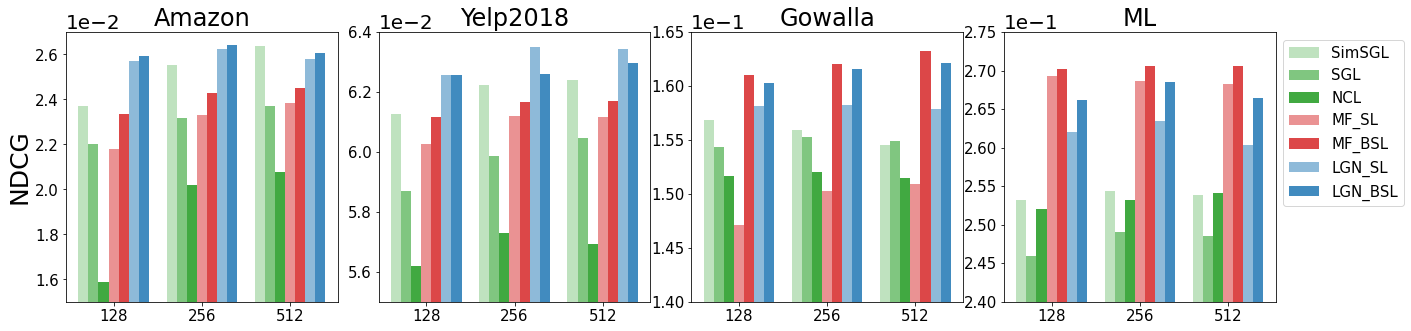

In [64]:
from tkinter.ttk import Style
import matplotlib.pyplot as plt
import matplotlib    
import numpy as np
# data = tau_fig
font2 = {'family': 'sans-serif',
        'sans-serif': 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font2)
f, axs = plt.subplots(1,4,figsize=(20, 5), facecolor='white')

labels2 = ['simsgl', 'sgl', 'ncl', 'mf_SL', 'mf_BSL', 'LGN_SL', 'LGN_BSL']

label = np.arange(3) + 1

hatchs = ["/", "\\", "xx","+", "x"]
colors = [current_palette[1], current_palette[2], current_palette[4], current_palette[3], current_palette[0]]
def create_multi_bars(ax, labels, datas, tick_step=1, group_gap=0.2, bar_gap=0):
    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        if index == 0:
            index_color = colors[1]
            alpha = 0.3
        elif index == 1:
            index_color = colors[1]
            alpha = 0.6
        elif index == 2:
            index_color = colors[1]
            alpha = 0.9
        elif index == 3:
            index_color = (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
            alpha = 0.5
        elif index == 4:
            index_color = (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
            alpha = 0.85
        elif index == 5:
            index_color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
            alpha = 0.5
        elif index == 6:
            index_color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
            alpha = 0.85
        ax.bar(baseline_x + index*bar_span, y, bar_width, label=labels2[index], alpha=alpha, color=index_color)
    # ax.set_xlabel('Group ID')
    ax.set_ylabel("ndcg@20")
    labelss = ["128", "256", "512"]
    ax.set_xticks(ticks, labelss)
    # plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    # ax.legend()
    # ax.set_xticks(ticks, labels)

for i, v in enumerate(tau_fig):
  ax=axs[i]
  data = v
  print(data)
  create_multi_bars(ax, label, data)
  if i != 0:
        ax.set_ylabel('')
  else:
      ax.set_ylabel('NDCG', size=25)
  ax.tick_params(labelsize=15)
x_view_label = [0, 0.005, 0.010, 0.015]
labels_view = [r'0', r'5', r'10', r'15']
axs[3].legend(labels=['SimSGL', 'SGL', 'NCL', 'MF_SL', 'MF_BSL', 'LGN_SL', 'LGN_BSL'], loc='upper left', bbox_to_anchor=(1.0, 1.), fontsize=15)


axs[0].set_ylim((0.015, 0.027))
axs[1].set_ylim((0.055, 0.064))
axs[2].set_ylim((0.14, 0.165))
axs[3].set_ylim((0.24, 0.275))

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[2].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
axs[3].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))

axs[0].set_title("Amazon")
axs[1].set_title("Yelp2018")
axs[2].set_title("Gowalla")
axs[3].set_title("ML")
# f.tight_layout()#调整整体空白
f.tight_layout()#调整整体空白
plt.subplots_adjust(wspace=0.15, hspace=0.05)#调整子图间距
plt.savefig("../figs/ndcg_DIM.pdf", bbox_inches = 'tight')
# plt.show()

# NDCG 5 10 15 20

In [13]:
import os
import argparse
from collections import defaultdict as ddict
import numpy as np
# print(args.date)
f_out = open("/data/wujk/codes/BSL/log_all/outputs_ndcg_5_10_15_20.txt", 'w')
file_path = "/data/wujk/codes/BSL/log_all/2023-11-04/"
dirlist = os.listdir(file_path)
dirlist.sort()


filelist = []
file_name = []
score_all = []
score_all_ndcg = []
performance_acc = ddict(list)
performance_acc_last = {}
best_base_name = {}
for file_sin in dirlist:
    file_add = file_path + file_sin
    # print(file_add)
    if file_sin.startswith("Deepwalk"):
        row_result = 6
    else:
        row_result = 6
    if os.path.isfile(file_add):
        # print(file_add)
        cnt = 100
        best_score = []
        last_epoch = -1
        best_recall = []
        best_epoch = -1
        best_rate = -1
        finish_flag = -1
        with open(file_add) as f:
            for line in f.readlines():
                cnt += 1
                # print(cnt
                line = line.strip()
                if cnt == 3:
                    best_score.append(eval(line[line.find('N@5')+ 4 : line.find(',')]))
                    best_recall.append(eval(line[line.find('R@5')+ 4 : line.find(',', line.find(',') + 1)]))
                elif cnt == 4:
                    best_score.append(eval(line[line.find('N@10')+ 5 : line.find(',')]))
                    best_recall.append(eval(line[line.find('R@10')+ 5 : line.find(',', line.find(',') + 1)]))
                elif cnt == 5:
                    best_score.append(eval(line[line.find('N@15')+ 5 : line.find(',')]))
                    best_recall.append(eval(line[line.find('R@15')+ 5 : line.find(',', line.find(',') + 1)]))
                elif cnt == row_result:
                    best_score.append(eval(line[line.find('N@20')+ 5 : line.find(',')]))
                    best_recall.append(eval(line[line.find('R@20')+ 5 : line.find(',', line.find(',') + 1)]))
                    cnt = 100
                index = line.find("test!!")
                if index != -1:
                    cnt = 0
                if "start to test" in line:
                    finish_flag = 1
        model_name = file_sin[:-4]
        # print(line)
        click_1 = model_name.find("_")
        click_2 = model_name.find("_", click_1 + 1)
        click_3 = model_name.find("_", click_2 + 1)
        click_4 = model_name.find("_", click_3 + 1)
        click_5 = model_name.find("_", click_4 + 1)
        click_6 = model_name.find("_", click_5 + 1)

        dataset = model_name[click_2 + 1: click_3]
        if "DRO_POS" in model_name:
            model = model_name[click_5 + 1: click_6]
        else:
            model = model_name[click_3 + 1: click_4]
        if "t2_1.00" in model_name:
            name = "{}_{}_SL".format(dataset, model)
        else:
            if model == "mf" or model == "LGN":
                name = "{}_{}_BSL".format(dataset, model)
            else:
                name = "{}_{}".format(dataset, model)
        performance_acc_last[name] = {'ndcg': best_score, 'recall': best_recall}
        # performance_acc_last[model_name_]['recall'] = best_recall

f_out.close()

In [14]:
performance_acc_last

{'amazon_LGN_BSL': {'ndcg': [0.01687, 0.02077, 0.02321, 0.02491],
  'recall': [0.02433, 0.03617, 0.04515, 0.05212]},
 'amazon_LGN_SL': {'ndcg': [0.01679, 0.02073, 0.0231, 0.02485],
  'recall': [0.02407, 0.03607, 0.04479, 0.05194]},
 'amazon_mf_SL': {'ndcg': [0.01156, 0.01507, 0.0174, 0.01916],
  'recall': [0.01776, 0.02839, 0.03697, 0.04417]},
 'amazon_mf_BSL': {'ndcg': [0.01391, 0.01752, 0.01987, 0.02162],
  'recall': [0.02046, 0.0314, 0.04009, 0.04729]},
 'amazon_ncl': {'ndcg': [0.003375, 0.004129, 0.004411, 0.006082],
  'recall': [0.006719, 0.008996, 0.01005, 0.01684]},
 'amazon_sgl': {'ndcg': [0.0135, 0.01694, 0.01913, 0.02073],
  'recall': [0.01971, 0.0302, 0.03822, 0.04481]},
 'amazon_simsgl': {'ndcg': [0.01438, 0.01804, 0.02042, 0.02229],
  'recall': [0.02079, 0.03188, 0.04066, 0.04834]},
 'gowalla_LGN_BSL': {'ndcg': [0.1404, 0.1428, 0.1508, 0.159],
  'recall': [0.09078, 0.1321, 0.1626, 0.1892]},
 'gowalla_LGN_SL': {'ndcg': [0.1382, 0.1408, 0.1492, 0.1571],
  'recall': [0.09073,

In [15]:
lines=""
lines += "".ljust(25) + "amazon" + "".ljust(15) + "yelp2018" + "".ljust(15) +"gowalla" + "".ljust(15) + "ml" + "\n"
for ndcg in [0, 1, 2, 3]:
    for model in ['simsgl', 'sgl', 'ncl', 'mf_SL', 'mf_BSL', 'LGN_SL', 'LGN_BSL']:
        lines += "".format(ndcg) + "\t" + model.ljust(10) + " "
        for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
            name="{}_{}".format(dataset, model)
            # print()
            if name in performance_acc_last:
                if dataset == "ml":
                    line="{:.4f} & {:.4f} \\\\ ".format(performance_acc_last[name]['recall'][ndcg], performance_acc_last[name]['ndcg'][ndcg]).rjust(20)
                else:
                    line="{:.4f} & {:.4f} & ".format(performance_acc_last[name]['recall'][ndcg], performance_acc_last[name]['ndcg'][ndcg]).rjust(20)
            else:
                if dataset == "ml":
                    line="  &   \\\\".rjust(20)
                else:
                    line="  &        & ".rjust(20)
            lines += line
        # lin
        lines += "\n"
    lines += "\n"  
print(lines)

                         amazon               yelp2018               gowalla               ml
	simsgl       0.0208 & 0.0144 &   0.0246 & 0.0464 &   0.0890 & 0.1378 &  0.1015 & 0.2251 \\ 
	sgl          0.0197 & 0.0135 &   0.0236 & 0.0442 &   0.0876 & 0.1358 &  0.0958 & 0.2202 \\ 
	ncl          0.0067 & 0.0034 &   0.0216 & 0.0406 &   0.0862 & 0.1352 &  0.1000 & 0.2289 \\ 
	mf_SL        0.0178 & 0.0116 &   0.0240 & 0.0454 &   0.0782 & 0.1162 &  0.1113 & 0.2427 \\ 
	mf_BSL       0.0205 & 0.0139 &   0.0247 & 0.0467 &   0.0910 & 0.1402 &  0.1135 & 0.2454 \\ 
	LGN_SL       0.0241 & 0.0168 &   0.0251 & 0.0475 &   0.0907 & 0.1382 &  0.1043 & 0.2273 \\ 
	LGN_BSL      0.0243 & 0.0169 &   0.0254 & 0.0479 &   0.0908 & 0.1404 &  0.1080 & 0.2331 \\ 

	simsgl       0.0319 & 0.0180 &   0.0429 & 0.0493 &   0.1285 & 0.1394 &  0.1711 & 0.2309 \\ 
	sgl          0.0302 & 0.0169 &   0.0406 & 0.0467 &   0.1262 & 0.1373 &  0.1594 & 0.2212 \\ 
	ncl          0.0090 & 0.0041 &   0.0378 & 0.0433 &   0.1240 & 0.136

In [16]:
tau_fig = []
for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
    tau_fig_ = []
    for model in ['simsgl', 'sgl', 'ncl', 'mf_SL', 'mf_BSL', 'LGN_SL', 'LGN_BSL']:
        tau_fig_tmp = []
        name="{}_{}".format(dataset, model)
        for ndcg in [0, 1, 2]:
            tau_fig_tmp.append(performance_acc_last[name]['ndcg'][ndcg])
        tau_fig_.append(tau_fig_tmp)
    tau_fig.append(tau_fig_)

In [17]:
tau_fig

[[[0.01438, 0.01804, 0.02042],
  [0.0135, 0.01694, 0.01913],
  [0.003375, 0.004129, 0.004411],
  [0.01156, 0.01507, 0.0174],
  [0.01391, 0.01752, 0.01987],
  [0.01679, 0.02073, 0.0231],
  [0.01687, 0.02077, 0.02321]],
 [[0.04637, 0.04925, 0.05459],
  [0.04422, 0.04674, 0.052],
  [0.04056, 0.04333, 0.04852],
  [0.04543, 0.04853, 0.05385],
  [0.04668, 0.04933, 0.05466],
  [0.0475, 0.05054, 0.05571],
  [0.04795, 0.05081, 0.05623]],
 [[0.1378, 0.1394, 0.1474],
  [0.1358, 0.1373, 0.1449],
  [0.1352, 0.1361, 0.1433],
  [0.1162, 0.1221, 0.1311],
  [0.1402, 0.1424, 0.1503],
  [0.1382, 0.1408, 0.1492],
  [0.1404, 0.1428, 0.1508]],
 [[0.2251, 0.2309, 0.2395],
  [0.2202, 0.2212, 0.2296],
  [0.2289, 0.2317, 0.2402],
  [0.2427, 0.2456, 0.2556],
  [0.2454, 0.2483, 0.2575],
  [0.2273, 0.2322, 0.2432],
  [0.2331, 0.2377, 0.249]]]

In [18]:
import seaborn as sns
current_palette = sns.color_palette()

In [19]:
current_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

[[0.01438, 0.01804, 0.02042], [0.0135, 0.01694, 0.01913], [0.003375, 0.004129, 0.004411], [0.01156, 0.01507, 0.0174], [0.01391, 0.01752, 0.01987], [0.01679, 0.02073, 0.0231], [0.01687, 0.02077, 0.02321]]
[[0.04637, 0.04925, 0.05459], [0.04422, 0.04674, 0.052], [0.04056, 0.04333, 0.04852], [0.04543, 0.04853, 0.05385], [0.04668, 0.04933, 0.05466], [0.0475, 0.05054, 0.05571], [0.04795, 0.05081, 0.05623]]
[[0.1378, 0.1394, 0.1474], [0.1358, 0.1373, 0.1449], [0.1352, 0.1361, 0.1433], [0.1162, 0.1221, 0.1311], [0.1402, 0.1424, 0.1503], [0.1382, 0.1408, 0.1492], [0.1404, 0.1428, 0.1508]]
[[0.2251, 0.2309, 0.2395], [0.2202, 0.2212, 0.2296], [0.2289, 0.2317, 0.2402], [0.2427, 0.2456, 0.2556], [0.2454, 0.2483, 0.2575], [0.2273, 0.2322, 0.2432], [0.2331, 0.2377, 0.249]]


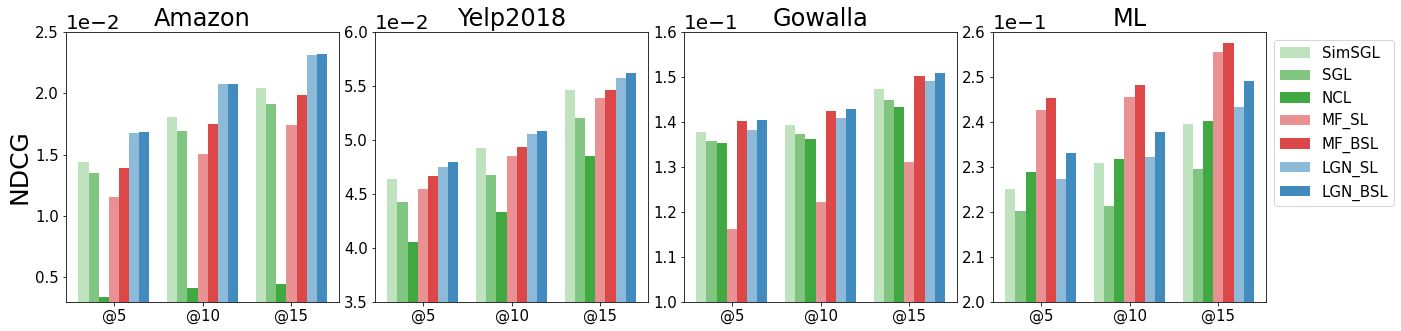

In [24]:
from tkinter.ttk import Style
import matplotlib.pyplot as plt
import matplotlib    
import numpy as np
# data = tau_fig
font2 = {'family': 'sans-serif',
        'sans-serif': 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font2)
f, axs = plt.subplots(1,4,figsize=(20, 5), facecolor='white')

labels2 = ['simsgl', 'sgl', 'ncl', 'mf_SL', 'mf_BSL', 'LGN_SL', 'LGN_BSL']

label = np.arange(3) + 1

hatchs = ["/", "\\", "xx","+", "x"]
colors = [current_palette[1], current_palette[2], current_palette[4], current_palette[3], current_palette[0]]
def create_multi_bars(ax, labels, datas, tick_step=1, group_gap=0.2, bar_gap=0):
    ticks = np.arange(len(labels)) * tick_step
    # group_num为数据的组数，即每组柱子的柱子个数
    group_num = len(datas)
    # group_width为每组柱子的总宽度，group_gap 为柱子组与组之间的间隙。
    group_width = tick_step - group_gap
    # bar_span为每组柱子之间在x轴上的距离，即柱子宽度和间隙的总和
    bar_span = group_width / group_num
    # bar_width为每个柱子的实际宽度
    bar_width = bar_span - bar_gap
    # baseline_x为每组柱子第一个柱子的基准x轴位置，随后的柱子依次递增bar_span即可
    baseline_x = ticks - (group_width - bar_span) / 2
    for index, y in enumerate(datas):
        if index == 0:
            index_color = colors[1]
            alpha = 0.3
        elif index == 1:
            index_color = colors[1]
            alpha = 0.6
        elif index == 2:
            index_color = colors[1]
            alpha = 0.9
        elif index == 3:
            index_color = (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
            alpha = 0.5
        elif index == 4:
            index_color = (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
            alpha = 0.85
        elif index == 5:
            index_color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
            alpha = 0.5
        elif index == 6:
            index_color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
            alpha = 0.85
        ax.bar(baseline_x + index*bar_span, y, bar_width, label=labels2[index], alpha=alpha, color=index_color)
    # ax.set_xlabel('Group ID')
    ax.set_ylabel("ndcg@20")
    labelss = ["@5", "@10", "@15"]
    ax.set_xticks(ticks, labelss)
    # plt.title('multi datasets')
    # x轴刻度标签位置与x轴刻度一致
    # ax.legend()
    # ax.set_xticks(ticks, labels)

for i, v in enumerate(tau_fig):
  ax=axs[i]
  data = v
  print(data)
  create_multi_bars(ax, label, data)
  if i != 0:
        ax.set_ylabel('')
  else:
      ax.set_ylabel('NDCG', size=25)
  ax.tick_params(labelsize=15)
x_view_label = [0, 0.005, 0.010, 0.015]
labels_view = [r'0', r'5', r'10', r'15']
# axs[1].set_yticks(x_view_label,labels_view, fontsize=20)
# axs[1].legend(labels=['simsgl', 'sgl', 'ncl', 'mf_SL', 'mf_BSL', 'LGN_SL', 'LGN_BSL'], prop={'weight':'bold'}, fontsize=1)
# axs[1].legend(labels=[r'No Norm', r'Grid Search', r'$Adap-\tau$'], prop={'weight':'bold'})
# axs[2].legend(labels=[r'No Norm', r'Grid Search', r'$Adap-\tau$'], prop={'weight':'bold'})
# axs[3].legend(labels=[r'No Norm', r'Grid Search', r'$Adap-\tau$'], prop={'weight':'bold'})
axs[3].legend(labels=['SimSGL', 'SGL', 'NCL', 'MF_SL', 'MF_BSL', 'LGN_SL', 'LGN_BSL'], loc='upper left', bbox_to_anchor=(1.0, 1.), fontsize=15)


axs[0].set_ylim((0.003, 0.025))
axs[1].set_ylim((0.035, 0.06))
axs[2].set_ylim((0.10, 0.16))
axs[3].set_ylim((0.20, 0.26))

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[2].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
axs[3].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))

axs[0].set_title("Amazon")
axs[1].set_title("Yelp2018")
axs[2].set_title("Gowalla")
axs[3].set_title("ML")
# f.tight_layout()#调整整体空白
f.tight_layout()#调整整体空白
plt.subplots_adjust(wspace=0.13, hspace=0.05)#调整子图间距
plt.savefig("../figs/ndcg_5_10_15.pdf", bbox_inches = 'tight')
# plt.show()

# SOTA + BSL

In [7]:
import os
import argparse
from collections import defaultdict as ddict
import numpy as np
# print(args.date)
f_out = open("/data/wujk/codes/BSL/log_all/outputs_2023-11-03.txt", 'w')
file_path = "/data/wujk/codes/BSL/log_all/2023-11-03/"
dirlist = os.listdir(file_path)
dirlist.sort()


filelist = []
file_name = []
score_all = []
score_all_ndcg = []
performance_acc = ddict(list)
performance_acc_last = {}
best_base_name = {}
for file_sin in dirlist:
    file_add = file_path + file_sin
    # print(file_add)
    if file_sin.startswith("Deepwalk"):
        row_result = 6
    else:
        row_result = 4
    if os.path.isfile(file_add):
        print(file_add)
        cnt = 100
        best_score = []
        last_epoch = -1
        best_recall = []
        best_epoch = -1
        best_rate = -1
        finish_flag = -1
        with open(file_add) as f:
            for line in f.readlines():
                cnt += 1
                # print(cnt
                line = line.strip()
                if cnt == row_result:
                    best_score = eval(line[line.find('N@20')+ 6 : line.find(',')])
                    best_recall = eval(line[line.find('R@20')+ 6 : line.find(',', line.find(',') + 1)])
                index = line.find("test!!")
                if index != -1:
                    cnt = 0
                if "start to test" in line:
                    finish_flag = 1
                if "N@5:" in line:
                    row_result = 6

        model_name = file_sin[:-4]
        print_text = "{}\t{}\t{}\t{}\t{}\n".format(model_name, best_epoch, best_score, best_recall,-1)
        f_out.write(print_text)

f_out.close()

/data/wujk/codes/BSL/log_all/2023-11-03/ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.20_0.90_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-03/ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.25_0.90_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-03/ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.85_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-03/ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.8_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-03/ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.91_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine.log
/data/wujk/codes/BSL/log_all/2023-11-03/ICDE_check_amazon_sgl_frame_bsl_4096

In [28]:
# ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.0_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine	-1	0.02413	0.05133	finish
# ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.15_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine	-1	0.02405	0.05106	finish
# ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.1_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine	-1	0.02409	0.05115	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.85_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.02382	0.05125	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.8_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.02377	0.05119	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.94_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.0239	0.05138	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.95_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.0239	0.05136	finish

f2 = "/data/wujk/codes/BSL/log_all/outputs_2023-11-03.txt"
best_base = {}
best_base_name = {}
best_base_result = {}
with open(f2) as f:
    for line in f.readlines():
        line = line.strip()
        # print(line)
        click_1 = line.find("_")
        click_2 = line.find("_", click_1 + 1)
        click_3 = line.find("_", click_2 + 1)
        click_4 = line.find("_", click_3 + 1)
        click_5 = line.find("_", click_4 + 1)
        click_6 = line.find("_", click_5 + 1)

        emp_cli_1 = line.find("\t")
        emp_cli_2 = line.find("\t", emp_cli_1 + 1)
        emp_cli_3 = line.find("\t", emp_cli_2 + 1)
        emp_cli_4 = line.find("\t", emp_cli_3 + 1)
        baseline = line[click_1 + 1: click_2]
        # print(line)
        ndcg = eval(line[emp_cli_2 + 1: emp_cli_3])
        recall = eval(line[emp_cli_3 + 1: emp_cli_4])
        # name_complete = line[: line.find("50")+2]
        name_complete = line[:emp_cli_2]
        dataset = line[click_2 + 1: click_3]
        if "DRO_POS" in line:
            model = line[click_5 + 1: click_6]
        else:
            model = line[click_3 + 1: click_4]
        if "_1.0_" in line:
            name = "{}_{}_SL".format(dataset, model)
        else:
            name = "{}_{}_BSL".format(dataset, model)
        if name not in best_base:
            best_base[name] = (ndcg, recall)
            best_base_name[name] = name_complete
        else:
            if best_base[name][0] < ndcg:
                best_base[name] = (ndcg, recall)
                best_base_name[name] = name_complete



In [29]:
# yelp2018_simsgl_frame_2048_lr_1e-3_l2_1e-5_HOP_3_cl_rate_5e-1_eps_5.	-1	0.05698	0.06947	finish
# yelp2018_simsgl_frame_2048_lr_1e-3_l2_1e-5_HOP_3_cl_rate_5e-2_eps_0.	-1	0.01573	0.01857	finish
# yelp2018_simsgl_frame_2048_lr_1e-3_l2_1e-5_HOP_3_cl_rate_5e-2_eps_1e-2	-1	0.05753	0.06984	finish
# yelp2018_simsgl_frame_2048_lr_1e-3_l2_1e-5_HOP_3_cl_rate_5e-2_eps_2.	-1	0.05579	0.06796	finish
# yelp2018_simsgl_frame_2048_lr_1e-3_l2_1e-5_HOP_3_cl_rate_5e-2_eps_5.	-1	0.05532	0.06742	finish
with open("/data/wujk/codes/BSL/log_all/output_sota.txt") as f:
    for line in f.readlines():
        line = line.strip()
        # print(line)
        click_1 = line.find("_")
        click_2 = line.find("_", click_1 + 1)
        click_3 = line.find("_", click_2 + 1)
        click_4 = line.find("_", click_3 + 1)
        click_5 = line.find("_", click_4 + 1)
        click_6 = line.find("_", click_5 + 1)

        emp_cli_1 = line.find("\t")
        emp_cli_2 = line.find("\t", emp_cli_1 + 1)
        emp_cli_3 = line.find("\t", emp_cli_2 + 1)
        emp_cli_4 = line.find("\t", emp_cli_3 + 1)
        baseline = line[click_1 + 1: click_2]
        # print(line)
        ndcg = eval(line[emp_cli_2 + 1: emp_cli_3])
        recall = eval(line[emp_cli_3 + 1: emp_cli_4])
        # name_complete = line[: line.find("50")+2]
        name_complete = line[:emp_cli_2]
        dataset = line[: click_1]
        model = line[click_1 + 1: click_2]
        if model in ['simsgl', 'sgl']:
            name = "{}_{}".format(dataset, model)
            # print(name)
            if name not in best_base:
                best_base[name] = (ndcg, recall)
                best_base_name[name] = name_complete
            else:
                if best_base[name][0] < ndcg:
                    best_base[name] = (ndcg, recall)
                    best_base_name[name] = name_complete

In [30]:
best_base

{'amazon_sgl_BSL': (0.02416, 0.05134),
 'amazon_sgl_SL': (0.02413, 0.05133),
 'amazon_simsgl_BSL': (0.02394, 0.05143),
 'amazon_simsgl_SL': (0.02394, 0.05146),
 'gowalla_sgl_BSL': (0.1592, 0.189),
 'gowalla_sgl_SL': (0.1568, 0.1872),
 'gowalla_simsgl_BSL': (0.1558, 0.1834),
 'gowalla_simsgl_SL': (0.1552, 0.1835),
 'ml_sgl_BSL': (0.2621, 0.2787),
 'ml_sgl_SL': (0.2579, 0.2766),
 'ml_simsgl_BSL': (0.2676, 0.2796),
 'ml_simsgl_SL': (0.2565, 0.2752),
 'yelp2018_sgl_BSL': (0.06151, 0.07408),
 'yelp2018_sgl_SL': (0.06122, 0.07362),
 'yelp2018_simsgl_BSL': (0.06111, 0.07365),
 'yelp2018_simsgl_SL': (0.06079, 0.07334),
 'amazon_sgl': (0.0209, 0.04537),
 'amazon_simsgl': (0.02251, 0.04862),
 'gowalla_sgl': (0.1524, 0.1798),
 'gowalla_simsgl': (0.155, 0.1834),
 'ml_sgl': (0.2401, 0.2528),
 'ml_simsgl': (0.252, 0.2689),
 'yelp2018_sgl': (0.05703, 0.06901),
 'yelp2018_simsgl': (0.05981, 0.07269)}

In [31]:
best_base_name

{'amazon_sgl_BSL': 'ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.9_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine\t-1',
 'amazon_sgl_SL': 'ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.0_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine\t-1',
 'amazon_simsgl_BSL': 'ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.35_1.02_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine\t-1',
 'amazon_simsgl_SL': 'ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.0_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine\t-1',
 'gowalla_sgl_BSL': 'ICDE_check_gowalla_sgl_frame_bsl_2048_lr_1e-3_l2_1e-5_HOP_1_T_0.2_t_0.12_0.84_AUG_ED_reweight_drop_0.1_ssl_weight_0.0_no_sample_0_no_cosine\t-1',
 'gowalla_sgl_SL': 'ICDE_check_gowalla_sgl_frame_bsl_2048_lr_1e-3_l2_1e-5_HOP_1_T_0.2_t_0.12_1.0_AUG_ED_reweight_drop_0.1_ssl_weight_0.0_no_sample_0_no_cosine\t-1',
 'gowalla_simsgl_BSL': 'ICDE_chec

In [32]:
scores = []
for model in [ 'sgl', 'sgl_SL','sgl_BSL', 'simsgl', 'simsgl_SL', 'simsgl_BSL']:
    scores_ = []
    for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
        name="{}_{}".format(dataset, model)
        # print()
        scores_.append(best_base[name][1])
        scores_.append(best_base[name][0])
    scores.append(scores_)
# print(scores)
scores = np.array(scores)
print(scores)
imp_1 = (scores[:3] / scores[0] - 1) * 100
imp_2 = (scores[3: ] / scores[3] - 1) * 100
imp = np.concatenate([imp_1, imp_2])
# imp = imp_1 + imp_2
print(imp)

[[0.04537 0.0209  0.06901 0.05703 0.1798  0.1524  0.2528  0.2401 ]
 [0.05133 0.02413 0.07362 0.06122 0.1872  0.1568  0.2766  0.2579 ]
 [0.05134 0.02416 0.07408 0.06151 0.189   0.1592  0.2787  0.2621 ]
 [0.04862 0.02251 0.07269 0.05981 0.1834  0.155   0.2689  0.252  ]
 [0.05146 0.02394 0.07334 0.06079 0.1835  0.1552  0.2752  0.2565 ]
 [0.05143 0.02394 0.07365 0.06111 0.1834  0.1558  0.2796  0.2676 ]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [13.13643377 15.45454545  6.68019128  7.34701035  4.11568409  2.88713911
   9.41455696  7.41357768]
 [13.15847476 15.59808612  7.34676134  7.85551464  5.11679644  4.46194226
  10.24525316  9.16284881]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 5.84121761  6.35273212  0.89420828  1.63852199  0.05452563  0.12903226
   2.34287839  1.78571429]
 [ 5.7795146   6.35273212  1.32067685  2.17354957  0.          0.51612903
   3.97917441  6.19047619]]


In [33]:
lines = ""
for i, v in enumerate(scores):
    lines += "{}\t".format(i)
    for j, v_ in enumerate(v):
        if i == 0 or i == 3:
            if j != len(v) - 1:
                lines += "${:.4f} $&".format(v_)
                # lines += "$ {:.4f}^{{\color{{+}}+ {:.2f}\%}}$ & ".format(v_, imp[i, j])
            else:
                lines += "{:.4f} & \\\\ ".format(v_)
        else:
            if j != len(v) - 1:
                lines += "$ {:.4f}^{{\color{{+}}+ {:.2f}\%}}$ & ".format(v_, imp[i, j])
            else:
                # lines += "{:.4f} \\\\ ".format(v_)
                lines += "$ {:.4f}^{{\color{{+}}+ {:.2f}\%}}$ & \color{{+}}+ {:.2f}\%  \\\\ ".format(v_, imp[i, j], imp.mean(axis=1)[i])
    lines += "\n"
print(lines)

0	$0.0454 $&$0.0209 $&$0.0690 $&$0.0570 $&$0.1798 $&$0.1524 $&$0.2528 $&0.2401 & \\ 
1	$ 0.0513^{\color{+}+ 13.14\%}$ & $ 0.0241^{\color{+}+ 15.45\%}$ & $ 0.0736^{\color{+}+ 6.68\%}$ & $ 0.0612^{\color{+}+ 7.35\%}$ & $ 0.1872^{\color{+}+ 4.12\%}$ & $ 0.1568^{\color{+}+ 2.89\%}$ & $ 0.2766^{\color{+}+ 9.41\%}$ & $ 0.2579^{\color{+}+ 7.41\%}$ & \color{+}+ 8.31\%  \\ 
2	$ 0.0513^{\color{+}+ 13.16\%}$ & $ 0.0242^{\color{+}+ 15.60\%}$ & $ 0.0741^{\color{+}+ 7.35\%}$ & $ 0.0615^{\color{+}+ 7.86\%}$ & $ 0.1890^{\color{+}+ 5.12\%}$ & $ 0.1592^{\color{+}+ 4.46\%}$ & $ 0.2787^{\color{+}+ 10.25\%}$ & $ 0.2621^{\color{+}+ 9.16\%}$ & \color{+}+ 9.12\%  \\ 
3	$0.0486 $&$0.0225 $&$0.0727 $&$0.0598 $&$0.1834 $&$0.1550 $&$0.2689 $&0.2520 & \\ 
4	$ 0.0515^{\color{+}+ 5.84\%}$ & $ 0.0239^{\color{+}+ 6.35\%}$ & $ 0.0733^{\color{+}+ 0.89\%}$ & $ 0.0608^{\color{+}+ 1.64\%}$ & $ 0.1835^{\color{+}+ 0.05\%}$ & $ 0.1552^{\color{+}+ 0.13\%}$ & $ 0.2752^{\color{+}+ 2.34\%}$ & $ 0.2565^{\color{+}+ 1.79\%}$ & \colo

In [5]:
# ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.0_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine	-1	0.02413	0.05133	finish
# ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.15_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine	-1	0.02405	0.05106	finish
# ICDE_check_amazon_sgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_1.1_AUG_ED_reweight_drop_0.05_ssl_weight_1e-4_no_sample_0_no_cosine	-1	0.02409	0.05115	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.85_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.02382	0.05125	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.8_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.02377	0.05119	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.94_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.0239	0.05138	finish
# ICDE_check_amazon_simsgl_frame_bsl_4096_lr_1e-3_l2_1e-1_HOP_3_T_0.2_t_0.30_0.95_cl_rate_0.05_eps_0.01_no_sample_0_no_cosine	-1	0.0239	0.05136	finish

f2 = "/data/wujk/codes/BSL/log_all/outputs_2023-11-07.txt"
best_base = {}
best_base_name = {}
best_base_result = {}
with open(f2) as f:
    for line in f.readlines():
        line = line.strip()
        if not line.startswith("ICDE_rebuttal"):
            break
        # print(line)
        click_1 = line.find("_")
        click_2 = line.find("_", click_1 + 1)
        click_3 = line.find("_", click_2 + 1)
        click_4 = line.find("_", click_3 + 1)
        click_5 = line.find("_", click_4 + 1)
        click_6 = line.find("_", click_5 + 1)

        emp_cli_1 = line.find("\t")
        emp_cli_2 = line.find("\t", emp_cli_1 + 1)
        emp_cli_3 = line.find("\t", emp_cli_2 + 1)
        emp_cli_4 = line.find("\t", emp_cli_3 + 1)
        baseline = line[click_1 + 1: click_2]
        # print(line)
        ndcg = eval(line[emp_cli_2 + 1: emp_cli_3])
        recall = eval(line[emp_cli_3 + 1: emp_cli_4])
        # name_complete = line[: line.find("50")+2]
        name_complete = line[:emp_cli_2]
        dataset = line[click_2 + 1: click_3]
        if "DRO_POS" in line:
            model = line[click_5 + 1: click_6]
        else:
            model = line[click_3 + 1: click_4]
        if "bsl" in line:
            if "_1.00_" in line:
                name = "{}_{}_SL".format(dataset, model)
            else:
                name = "{}_{}_BSL".format(dataset, model)

        else:
            name = "{}_{}".format(dataset, model)
        if name not in best_base:
            best_base[name] = (ndcg, recall)
            best_base_name[name] = name_complete[:-3]
        else:
            if best_base[name][0] < ndcg:
                best_base[name] = (ndcg, recall)
                best_base_name[name] = name_complete[:-3]



In [6]:
best_base_name

{'amazon_lightgcl_BSL': 'ICDE_rebuttal_amazon_lightgcl_frame_bsl_t1_0.3_T_0.30_1.20_lambda_0.0_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg_no_cosine',
 'amazon_lightgcl_SL': 'ICDE_rebuttal_amazon_lightgcl_frame_bsl_t1_0.3_T_0.30_1.00_lambda_0.0_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg',
 'amazon_lightgcl': 'ICDE_rebuttal_amazon_lightgcl_frame_t1_0.3_lambda_0.5_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg',
 'gowalla_lightgcl_BSL': 'ICDE_rebuttal_gowalla_lightgcl_frame_bsl_t1_0.3_T_0.12_1.20_lambda_0.0_HOPS_2_2048_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg_no_cosine',
 'gowalla_lightgcl_SL': 'ICDE_rebuttal_gowalla_lightgcl_frame_bsl_t1_0.3_T_0.12_1.00_lambda_0.0_HOPS_1_2048_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg_no_cosine',
 'gowalla_lightgcl': 'ICDE_rebuttal_gowalla_lightgcl_frame_t1_0.1_lambda_0.6_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg',
 'ml_lightgcl_SL': 'ICDE_rebuttal_ml_lightgcl_frame_bsl_t1_1.0_T_0.15_1.00_lambda_1e-3_HOPS_1_4096_800_lr_1e-3_l2_1e-5_DROP_0.0_p_50_uni

In [7]:
best_base

{'amazon_lightgcl_BSL': (0.0247, 0.05327),
 'amazon_lightgcl_SL': (0.02462, 0.05305),
 'amazon_lightgcl': (0.02241, 0.0489),
 'gowalla_lightgcl_BSL': (0.1553, 0.1837),
 'gowalla_lightgcl_SL': (0.1539, 0.1805),
 'gowalla_lightgcl': (0.1535, 0.1834),
 'ml_lightgcl_SL': (0.2562, 0.2742),
 'ml_lightgcl_BSL': (0.2597, 0.2767),
 'ml_lightgcl': (0.2287, 0.2316),
 'yelp2018_LGN': (0.06173, 0.07457),
 'yelp2018_lightgcl_SL': (0.05811, 0.06981),
 'yelp2018_lightgcl_BSL': (0.05944, 0.0714),
 'yelp2018_lightgcl': (0.05732, 0.06973)}

In [8]:
lines=""
lines += "".ljust(25) + "amazon" + "".ljust(15) + "yelp2018" + "".ljust(15) +"gowalla" + "".ljust(15) + "ml" + "\n"
for model in ['lightgcl', 'lightgcl_SL', 'lightgcl_BSL']:
    lines += "" + "\t" + model.ljust(10) + " "
    for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
        name="{}_{}".format(dataset, model)
        # print()
        if name in best_base:
            if dataset == "ml":
                line="{:.4f} & {:.4f} \\\\ ".format(best_base[name][1], best_base[name][0]).rjust(20)
            else:
                line="{:.4f} & {:.4f} & ".format(best_base[name][1], best_base[name][0]).rjust(20)
        else:
            if dataset == "ml":
                line="  &   \\\\".rjust(20)
            else:
                line="  &        & ".rjust(20)
        lines += line
    # lin
    lines += "\n"
lines += "\n"  
print(lines)

                         amazon               yelp2018               gowalla               ml
	lightgcl     0.0489 & 0.0224 &   0.0697 & 0.0573 &   0.1834 & 0.1535 &  0.2316 & 0.2287 \\ 
	lightgcl_SL   0.0530 & 0.0246 &   0.0698 & 0.0581 &   0.1805 & 0.1539 &  0.2742 & 0.2562 \\ 
	lightgcl_BSL   0.0533 & 0.0247 &   0.0714 & 0.0594 &   0.1837 & 0.1553 &  0.2767 & 0.2597 \\ 




In [10]:
import numpy as np
scores = []
for model in ['lightgcl', 'lightgcl_SL', 'lightgcl_BSL']:
    scores_ = []
    for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
        name="{}_{}".format(dataset, model)
        scores_.append(best_base[name][1])
        scores_.append(best_base[name][0])
    scores.append(scores_)
scores = np.array(scores)
scores = (scores[: 3] / scores[0] - 1) * 100
line = ""
for score_ in scores:
    for score_2 in score_: 
        line += "{:.2f} & ".format(score_2)
    line = line[:-2] + "\\\\ \n"
print(line)

0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\ 
8.49 & 9.86 & 0.11 & 1.38 & -1.58 & 0.26 & 18.39 & 12.02 \\ 
8.94 & 10.22 & 2.39 & 3.70 & 0.16 & 1.17 & 19.47 & 13.55 \\ 



In [11]:
scores = []
for model in ['lightgcl', 'lightgcl_SL', 'lightgcl_BSL']:
    scores_ = []
    for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
        name="{}_{}".format(dataset, model)
        scores_.append(best_base[name][1])
        scores_.append(best_base[name][0])
    scores.append(scores_)
# print(scores)
scores = np.array(scores)
print(scores)
imp = (scores[:3] / scores[0] - 1) * 100
print(imp)
print(imp.mean(axis=1))

[[0.0489  0.02241 0.06973 0.05732 0.1834  0.1535  0.2316  0.2287 ]
 [0.05305 0.02462 0.06981 0.05811 0.1805  0.1539  0.2742  0.2562 ]
 [0.05327 0.0247  0.0714  0.05944 0.1837  0.1553  0.2767  0.2597 ]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 8.48670757  9.8616689   0.11472824  1.37822749 -1.58124318  0.26058632
  18.39378238 12.02448623]
 [ 8.93660532 10.21865239  2.39495196  3.69853454  0.16357688  1.17263844
  19.47322971 13.55487538]]
[0.         6.11736799 7.45163308]


In [12]:
lines = ""
for i, v in enumerate(scores):
    lines += "{}\t".format(i)
    for j, v_ in enumerate(v):
        if i == 0 or i == 3:
            if j != len(v) - 1:
                lines += "${:.4f} $&".format(v_)
                # lines += "$ {:.4f}^{{\color{{+}}+ {:.2f}\%}}$ & ".format(v_, imp[i, j])
            else:
                lines += "{:.4f} & \\\\ ".format(v_)
        else:
            if j != len(v) - 1:
                lines += "$ {:.4f}^{{\color{{+}}+ {:.2f}\%}}$ & ".format(v_, imp[i, j])
            else:
                # lines += "{:.4f} \\\\ ".format(v_)
                lines += "$ {:.4f}^{{\color{{+}}+ {:.2f}\%}}$ & \color{{+}}+ {:.2f}\%  \\\\ ".format(v_, imp[i, j], imp.mean(axis=1)[i])
    lines += "\n"
print(lines)
# $ 0.1829^{\color{+}+ 1.61\%}$

0	$0.0489 $&$0.0224 $&$0.0697 $&$0.0573 $&$0.1834 $&$0.1535 $&$0.2316 $&0.2287 & \\ 
1	$ 0.0530^{\color{+}+ 8.49\%}$ & $ 0.0246^{\color{+}+ 9.86\%}$ & $ 0.0698^{\color{+}+ 0.11\%}$ & $ 0.0581^{\color{+}+ 1.38\%}$ & $ 0.1805^{\color{+}+ -1.58\%}$ & $ 0.1539^{\color{+}+ 0.26\%}$ & $ 0.2742^{\color{+}+ 18.39\%}$ & $ 0.2562^{\color{+}+ 12.02\%}$ & \color{+}+ 6.12\%  \\ 
2	$ 0.0533^{\color{+}+ 8.94\%}$ & $ 0.0247^{\color{+}+ 10.22\%}$ & $ 0.0714^{\color{+}+ 2.39\%}$ & $ 0.0594^{\color{+}+ 3.70\%}$ & $ 0.1837^{\color{+}+ 0.16\%}$ & $ 0.1553^{\color{+}+ 1.17\%}$ & $ 0.2767^{\color{+}+ 19.47\%}$ & $ 0.2597^{\color{+}+ 13.55\%}$ & \color{+}+ 7.45\%  \\ 



In [116]:
best_base_name

{'amazon_mf': 'ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.10_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_256',
 'amazon_lightgcl_BSL': 'ICDE_rebuttal_amazon_lightgcl_frame_bsl_t1_0.3_T_0.30_1.20_lambda_0.0_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg_no_cosine',
 'amazon_lightgcl_SL': 'ICDE_rebuttal_amazon_lightgcl_frame_bsl_t1_0.3_T_0.30_1.00_lambda_0.0_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg',
 'amazon_lightgcl': 'ICDE_rebuttal_amazon_lightgcl_frame_t1_0.3_lambda_0.5_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg',
 'gowalla_lightgcl_BSL': 'ICDE_rebuttal_gowalla_lightgcl_frame_bsl_t1_0.3_T_0.12_1.20_lambda_0.0_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg_no_cosine',
 'gowalla_lightgcl_SL': 'ICDE_rebuttal_gowalla_lightgcl_frame_bsl_t1_0.3_T_0.12_1.00_lambda_0.0_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg',
 'gowalla_lightgcl': 'ICDE_rebuttal_gowalla_lightgcl_frame_t1_0.3_lambda_0.6_HOPS_2_4096_1_lr_1e-3_l2_1e-5_DROP_0.0_p_50_neg',
 'ml_ligh

# sensity

In [5]:
import os
import argparse
from collections import defaultdict as ddict
import numpy as np
# print(args.date)
f_out = open("/data/wujk/codes/BSL/log_all/outputs_sensity.txt", 'w')
file_path = "/data/wujk/codes/BSL/log_all/sensity/"
dirlist = os.listdir(file_path)
dirlist.sort()


filelist = []
file_name = []
score_all = []
score_all_ndcg = []
performance_acc = ddict(list)
performance_acc_last = {}
best_base_name = {}
for file_sin in dirlist:
    file_add = file_path + file_sin
    # print(file_add)
    if file_sin.startswith("Deepwalk"):
        row_result = 6
    else:
        row_result = 6
    if os.path.isfile(file_add):
        # print(file_add)
        cnt = 100
        best_score = -1
        last_epoch = -1
        best_recall = -1
        best_epoch = -1
        best_rate = -1
        finish_flag = -1
        with open(file_add) as f:
            for line in f.readlines():
                cnt += 1
                # print(cnt
                line = line.strip()
                if cnt == row_result:
                    current_scores = eval(line[line.find('N@20')+ 6 : line.find(',')])
                    current_recall = eval(line[line.find('R@20')+ 6 : line.find(',', line.find(',') + 1)])
                    if current_scores > best_score:
                        best_score = current_scores
                        best_recall = current_recall
                        best_epoch = -1
                        score_all.append(best_recall)
                        score_all_ndcg.append(best_score)
                    cnt = 100
                index = line.find("test!!")
                if index != -1:
                    cnt = 0
                if "start to test" in line:
                    finish_flag = 1
        model_name = file_sin[:-4]
        finish_str = "finish" if finish_flag==1 else "unfinish"
        model_name_ = model_name[: model_name.find("_", model_name.find("_") + 1)]
        # print(model_name_)
        if model_name_ not in performance_acc_last:
            performance_acc_last[model_name_] = (best_score, best_recall)
            best_base_name[model_name_] = model_name
        else:
            if best_score > performance_acc_last[model_name_][0]:
                performance_acc_last[model_name_] = (best_score, best_recall)
                best_base_name[model_name_] = model_name
        print_text = "{}\t{}\t{}\t{}\t{}\n".format(model_name, best_epoch, best_score, best_recall,finish_str)
        f_out.write(print_text)
f_out.close()

In [6]:
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_256	-1	0.02329	0.05174	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_512	-1	0.02383	0.0525	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.32_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_128	-1	0.02275	0.04941	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.32_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_256	-1	0.02381	0.05182	finish
# ICDE_rebuttal_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.32_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_DIM_512	-1	0.02349	0.05106	finish

f2 = "/data/wujk/codes/BSL/log_all/outputs_sensity.txt"
best_base = {}
best_base_name = {}
best_base_result = {}
with open(f2) as f:
    for line in f.readlines():
        line = line.strip()
        # print(line)
        click_1 = line.find("_")
        click_2 = line.find("_", click_1 + 1)
        click_3 = line.find("_", click_2 + 1)
        click_4 = line.find("_", click_3 + 1)
        click_5 = line.find("_", click_4 + 1)
        click_6 = line.find("_", click_5 + 1)

        emp_cli_1 = line.find("\t")
        emp_cli_2 = line.find("\t", emp_cli_1 + 1)
        emp_cli_3 = line.find("\t", emp_cli_2 + 1)
        emp_cli_4 = line.find("\t", emp_cli_3 + 1)
        baseline = line[click_1 + 1: click_2]
        ndcg = eval(line[emp_cli_2 + 1: emp_cli_3])
        recall = eval(line[emp_cli_3 + 1: emp_cli_4])
        # name_complete = line[: line.find("50")+2]
        name_complete = line[:emp_cli_2]
        dim = line[line.find("DIM_") + 4: line.find("DIM_") + 7]
        dataset = line[click_2 + 1: click_3]
        if "DRO_POS" in line:
            model = line[click_5 + 1: click_6]
        else:
            model = line[click_3 + 1: click_4]
        # print(line)
        # print(line[line.find("t2")+1: ])
        name = "{}_{}_{}".format(dataset, model, line[line.find("t2") + 3: line.find("t2") + 6])
        if name not in best_base:
            best_base[name] = (ndcg, recall)
        else:
            if best_base[name][0] < ndcg:
                best_base[name] = (ndcg, recall)
                best_base_name[name] = name_complete


In [7]:
best_base

{'amazon_LGN_0.5': (0.02251, 0.04945),
 'amazon_LGN_0.8': (0.02491, 0.05212),
 'amazon_LGN_0.9': (0.02484, 0.0519),
 'amazon_LGN_1.0': (0.02485, 0.05193),
 'amazon_LGN_1.1': (0.02478, 0.05172),
 'amazon_LGN_1.2': (0.02461, 0.0514),
 'amazon_LGN_1.3': (0.02452, 0.05129),
 'amazon_LGN_1.4': (0.02454, 0.05112),
 'amazon_LGN_1.5': (0.02445, 0.05089),
 'amazon_LGN_2.0': (0.02416, 0.05035),
 'amazon_mf_0.5': (0.01182, 0.02841),
 'amazon_mf_0.8': (0.01687, 0.03971),
 'amazon_mf_0.9': (0.01788, 0.04183),
 'amazon_mf_1.0': (0.01916, 0.04417),
 'amazon_mf_1.1': (0.02018, 0.04593),
 'amazon_mf_1.2': (0.02134, 0.04743),
 'amazon_mf_1.3': (0.02114, 0.0466),
 'amazon_mf_1.4': (0.02062, 0.04543),
 'amazon_mf_1.5': (0.01989, 0.0443),
 'amazon_mf_2.0': (0.0127, 0.03157),
 'gowalla_LGN_0.5': (0.09558, 0.1153),
 'gowalla_LGN_0.8': (0.1588, 0.1887),
 'gowalla_LGN_0.9': (0.159, 0.189),
 'gowalla_LGN_1.0': (0.1571, 0.1874),
 'gowalla_LGN_1.1': (0.1547, 0.1852),
 'gowalla_LGN_1.2': (0.1519, 0.1831),
 'gowall

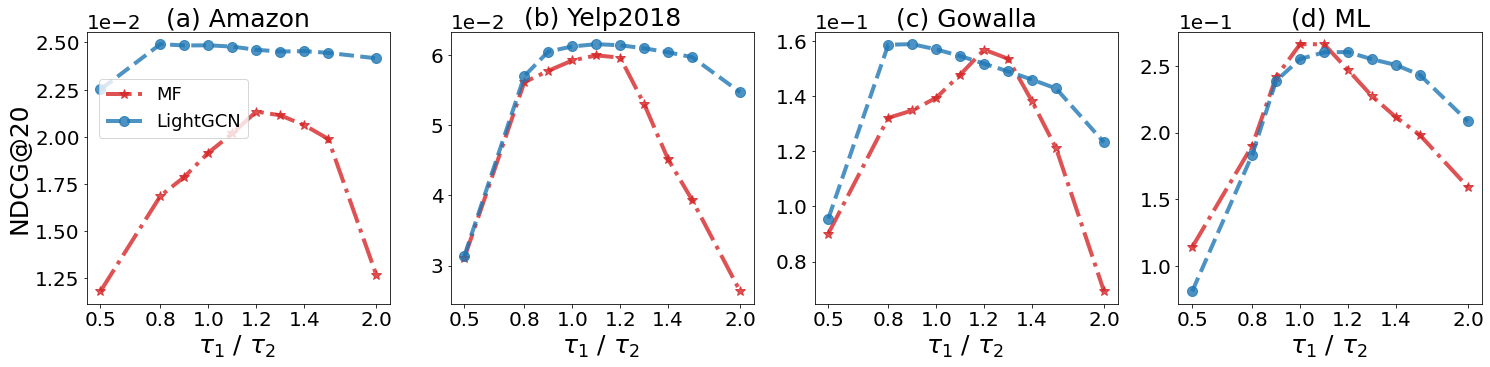

In [29]:
import matplotlib.pyplot as plt
import matplotlib    
import numpy as np

font2 = {'family': 'sans-serif',
        'sans-serif': 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font2)
# fig = plt.figure(figsize=(16, 9), facecolor='white')
# ax = fig.add_subplot(111)
data_all = []
for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
    score_data = []
    for name in ["mf", "LGN"]:
            scores_ = []
            for n_neg in ['0.5', '0.8', '0.9', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '2.0']:
                    name_1 = dataset + "_" + name + "_" +  n_neg
                    if name_1 not in best_base:
                        scores_.append(0)
                    else:
                        scores_.append(best_base[name_1][0])
            score_data.append(scores_)
    score_data = np.array(score_data)
    data_all.append(score_data)

f, axs = plt.subplots(1,4,figsize=(25, 5), facecolor='white')
for i, ax in enumerate(axs):
    # print(ax)
    # ax = axs[0
    score_data = data_all[i]
#     score_data = score_data / score_data.max(1,keepdims=True)
    x_label = [0, 10, 14, 18, 22, 26, 30, 34, 38, 46]
    # x_label = 
    x_view_label = [0, 10, 18, 26, 34, 46]
    labels_view = ['0.5', '0.8', '1.0', '1.2', '1.4', '2.0']
    msz = 10
    ls2 = 4
    ax.plot(x_label, score_data[0] , marker="*", markersize=msz, linestyle="-.", linewidth=ls2, alpha=0.8, color=current_palette[3])
    ax.plot(x_label, score_data[1] , marker="o", markersize=msz, linestyle="--", linewidth=ls2, alpha=0.8, color=current_palette[0])
    ax.set_xticks(x_view_label,labels_view, fontsize=20)
    # ax.set_yticks(fontsize=33)
    ax.tick_params(labelsize=20)
    ax.set_xlabel(r"$\tau_1$ / $\tau_2$ ", fontsize=25)
    if i == 0:
        ax.set_ylabel('NDCG@20', fontsize=25)
        ax.legend(labels=["MF", "LightGCN"], fontsize=8, prop={'size':18}, loc='upper left', bbox_to_anchor=(0.01, 0.86))
#     if i == 0:
axs[0].set_title('(a) Amazon', fontsize=25)
axs[1].set_title('(b) Yelp2018', fontsize=25)
axs[2].set_title('(c) Gowalla', fontsize=25)
axs[3].set_title('(d) ML', fontsize=25)
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[2].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
axs[3].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))

# plt.savefig("../figs/num_neg.pdf", bbox_inches = 'tight')
plt.savefig("../figs/sensity.pdf", format="pdf",bbox_inches="tight")
# plt.show()

In [25]:
current_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

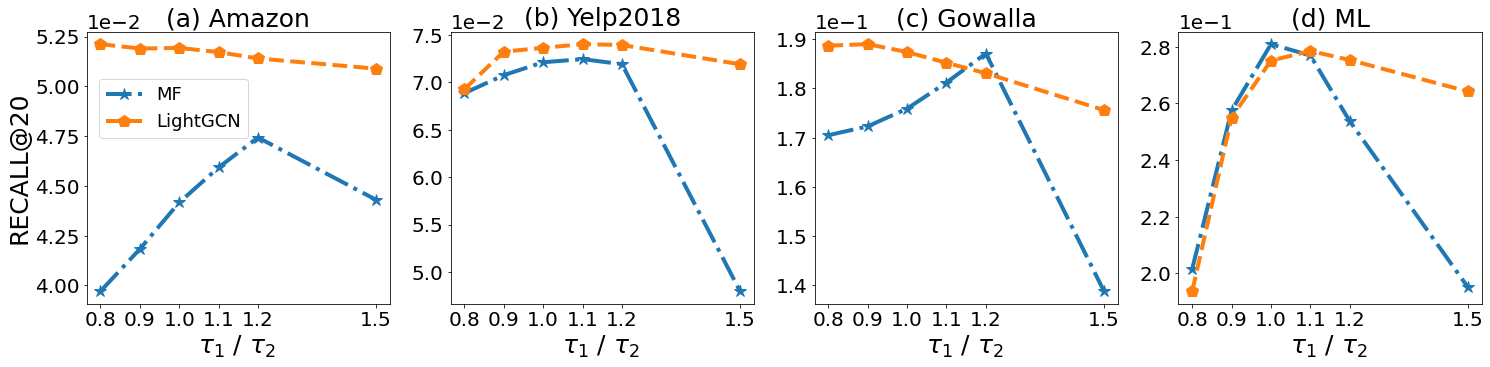

In [10]:
import matplotlib.pyplot as plt
import matplotlib    
import numpy as np

font2 = {'family': 'sans-serif',
        'sans-serif': 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font2)
# fig = plt.figure(figsize=(16, 9), facecolor='white')
# ax = fig.add_subplot(111)
data_all = []
for dataset in ['amazon', 'yelp2018', 'gowalla', 'ml']:
    score_data = []
    for name in ["mf", "LGN"]:
            scores_ = []
            for n_neg in ['0.8', '0.9', '1.0', '1.1', '1.2', '1.5']:
                    name_1 = dataset + "_" + name + "_" +  n_neg
                    scores_.append(best_base[name_1][1])
            score_data.append(scores_)
    score_data = np.array(score_data)
    data_all.append(score_data)

f, axs = plt.subplots(1,4,figsize=(25, 5), facecolor='white')
for i, ax in enumerate(axs):
    # print(ax)
    # ax = axs[0
    score_data = data_all[i]
#     score_data = score_data / score_data.max(1,keepdims=True)
    x_label = [0, 4, 8, 12, 16, 28]
    x_view_label = [0, 4, 8, 12, 16, 28]
    x_view_label = x_label
    labels_view = ['0.8', '0.9', '1.0', '1.1', '1.2', '1.5']
    msz = 12
    ls2 = 4
    ax.plot(x_label, score_data[0] , marker="*", markersize=msz, linestyle="-.", linewidth=ls2)
    ax.plot(x_label, score_data[1] , marker="p", markersize=msz, linestyle="--", linewidth=ls2)
    ax.set_xticks(x_view_label,labels_view, fontsize=20)
    # ax.set_yticks(fontsize=33)
    ax.tick_params(labelsize=20)
    ax.set_xlabel(r"$\tau_1$ / $\tau_2$ ", fontsize=25)
    if i == 0:
        ax.set_ylabel('RECALL@20', fontsize=25)
        ax.legend(labels=["MF", "LightGCN"], fontsize=8, prop={'size':18}, loc='upper left', bbox_to_anchor=(0.01, 0.86))
#     if i == 0:
axs[0].set_title('(a) Amazon', fontsize=25)
axs[1].set_title('(b) Yelp2018', fontsize=25)
axs[2].set_title('(c) Gowalla', fontsize=25)
axs[3].set_title('(d) ML', fontsize=25)
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
axs[2].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
axs[3].ticklabel_format(style='sci', axis='y', scilimits=(-1,1))

# plt.savefig("../figs/num_neg.pdf", bbox_inches = 'tight')
# plt.savefig("./num_neg.pdf", format="pdf",bbox_inches="tight")
plt.show()

In [31]:
score_data / score_data.max(1,keepdims=True)

array([[0.71450038, 0.90796394, 1.        , 0.99962434, 0.92749812,
        0.74417731],
       [0.70418748, 0.917403  , 0.98002305, 0.99923166, 1.        ,
        0.9339224 ]])

# 散点图

In [3]:
import torch
import os
from sklearn import manifold
import numpy as np
from sklearn.preprocessing import normalize
data_tsn_array = []
directory = "/data/wujk/codes/BSL/NOISE/"
dirlist = os.listdir(directory)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
# for dataset in ["amazon", "yelp2018", "gowalla", "ml"]:
for dataset in ["yelp2018", "gowalla", "ml"]:
    for model in ["_SL_", "BSL"]:
        for noise in ['NOISE_0._', 'NOISE_0.2_', 'NOISE_0.4_']:
            flag = 0
            # print(dataset, model, noise)
            for file in dirlist:
                # print(dirlist)
                if dataset in file and model in file and noise in file:
                    print(file)
                    flag = 1
                    a = torch.load(os.path.join(directory, file), map_location="cpu")
                    user_emb = a['user_embed']
                    item_emb = a['item_embed']
                    item_emb2 = item_emb.numpy()
                    idx = np.random.choice(item_emb2.shape[0],1000)
                  
                    selected_user_emb = item_emb2[idx]
                    data_tsn = selected_user_emb
                    data_tsn = normalize(data_tsn,axis=1,norm='l2')
                    data_tsn_2d = tsne.fit_transform(data_tsn)
                    data_tsn_array.append(data_tsn_2d)



_SL_ICDE_NOISE_yelp2018_DRO_POS_mf_frame_t1_0.11_t2_1.00_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_multi_uniform_gpu_NOISE_0._09_11_2023_16:23:14.ckpt
_SL_ICDE_NOISE_yelp2018_DRO_POS_mf_frame_t1_0.12_t2_1.00_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0.2_09_11_2023_14:34:44.ckpt
_SL_ICDE_NOISE_yelp2018_DRO_POS_mf_frame_t1_0.13_t2_1.00_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0.4_09_11_2023_07:09:45.ckpt
BSL_ICDE_NOISE_yelp2018_DRO_POS_mf_frame_t1_0.11_t2_1.10_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_multi_uniform_gpu_NOISE_0._09_11_2023_16:23:02.ckpt
BSL_ICDE_NOISE_yelp2018_DRO_POS_mf_frame_t1_0.12_t2_1.12_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_multi_uniform_gpu_NOISE_0.2_09_11_2023_08:03:41.ckpt
BSL_ICDE_NOISE_yelp2018_DRO_POS_mf_frame_t1_0.13_t2_1.11_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_multi_uniform_gpu_NOISE_0.4_09_11_2023_07:09:28.ckpt
_SL_gowalla_NOISE_0._DRO_POS_mf_frame_t1_0.08_t2

In [6]:
import torch
import os
from sklearn import manifold
import numpy as np
from sklearn.preprocessing import normalize
data_tsn_array = []
directory = "/data/wujk/codes/BSL/NOISE/AMAZON/"
dirlist = os.listdir(directory)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501, )
# for dataset in ["amazon", "yelp2018", "gowalla", "ml"]:
for dataset in ["amazon"]:
    for model in ["_SL_", "BSL"]:
        for noise in ['NOISE_0._', 'NOISE_0.2_', 'NOISE_0.4_']:
            flag = 0
            # print(dataset, model, noise)
            for file in dirlist:
                # print(dirlist)
                if dataset in file and model in file and noise in file:
                    print(file)
                    flag = 1
                    a = torch.load(os.path.join(directory, file), map_location="cpu")
                    user_emb = a['user_embed']
                    item_emb = a['item_embed']
                    item_emb2 = item_emb.numpy()
                    idx = np.random.choice(item_emb2.shape[0],5000)
                  
                    selected_user_emb = item_emb2[idx]
                    data_tsn = selected_user_emb
                    data_tsn = normalize(data_tsn,axis=1,norm='l2')
                    data_tsn_2d = tsne.fit_transform(data_tsn)
                    data_tsn_array.append(data_tsn_2d)



_SL_ICDE_NOISE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0._09_11_2023_08:07:07.ckpt
_SL_ICDE_NOISE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0.2_09_11_2023_07:09:11.ckpt
_SL_ICDE_NOISE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0.4_09_11_2023_07:09:51.ckpt
BSL_ICDE_NOISE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.32_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0._09_11_2023_22:48:43.ckpt
BSL_ICDE_NOISE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.24_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0.2_09_11_2023_22:49:12.ckpt
BSL_ICDE_NOISE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.22_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_uniform_gpu_NOISE_0.4_09_11_2023_22:49:46.ckpt


In [5]:
item_emb2.shape

(255403, 64)

In [1]:
import os
file_path = "/data/wujk/codes/BSL/DIRTY/"
dirlist = os.listdir(file_path)
for file in dirlist:
    if '1.00' in file:
        new_name = "_SL_" + file 
    else:
        new_name = "BSL_" + file 
    old_path = os.path.join(file_path, file)
    new_path = os.path.join(file_path, new_name)
    os.rename(old_path, new_path)

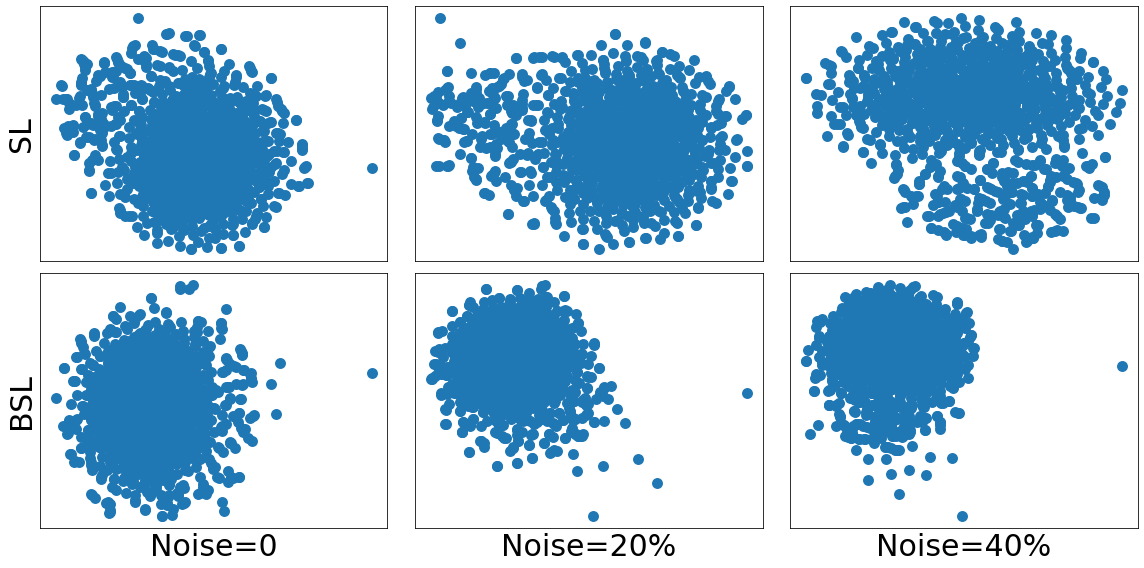

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
fig, axs = plt.subplots(2, 3, figsize=(16, 8), facecolor='white')
size_cnt=120
# color=""
for i, data_tsn_2d in enumerate(data_tsn_array[:6]):
    df_tsne = pd.DataFrame(data_tsn_2d, columns=['dim1', 'dim2'])
    df_tsne[['dim1']] = df_tsne[['dim1']].astype(float)
    df_tsne[['dim2']] = df_tsne[['dim2']].astype(float)
    axs_cnt = axs[i // 3][i % 3]
    # print(axs_cnt)
    sns.scatterplot(data=df_tsne, x='dim1', y='dim2', ax=axs_cnt, s=size_cnt, linewidth=1e-3) 
    axs_cnt.set_xticks([])
    axs_cnt.set_yticks([])
    axs_cnt.set_ylabel('')
    axs_cnt.set_xlabel('')
    # axs_cnt.set_visible(False)
axs[0][0].set_ylabel('SL', fontsize=30)
axs[1][0].set_ylabel('BSL', fontsize=30)

axs[1][0].set_xlabel('Noise=0', fontsize=30)
axs[1][1].set_xlabel('Noise=20%', fontsize=30)
axs[1][2].set_xlabel('Noise=40%', fontsize=30)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.08, hspace =0.05)#调整子图间距
# plt.show()
plt.savefig("../figs/amazon_tsne.pdf", bbox_inches = 'tight')

In [8]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

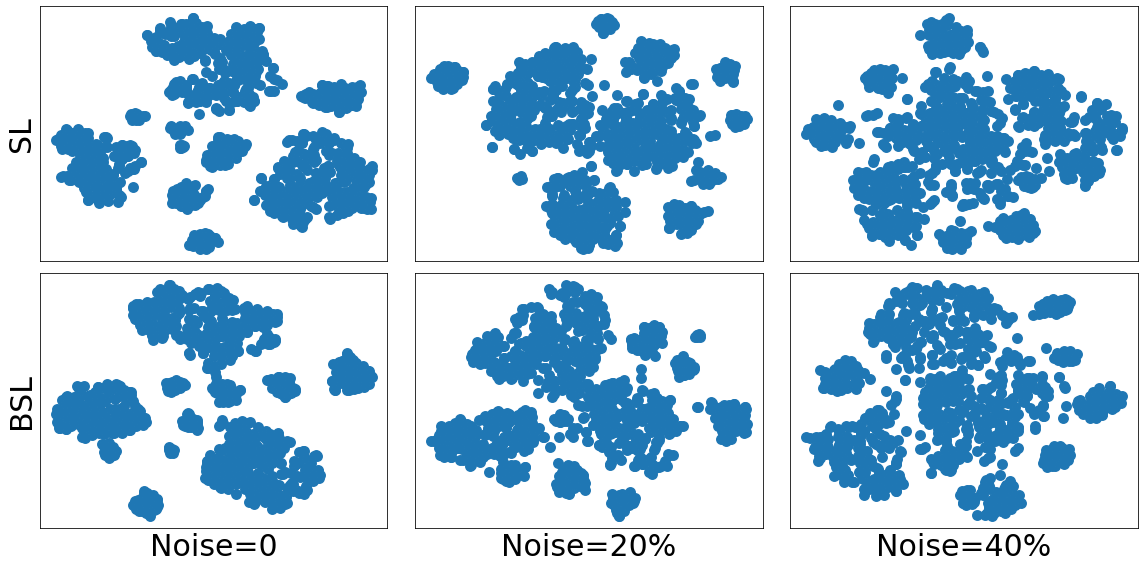

In [12]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
fig, axs = plt.subplots(2, 3, figsize=(16, 8), facecolor='white')
size_cnt=120
# color=""
for i, data_tsn_2d in enumerate(data_tsn_array[:6]):
    df_tsne = pd.DataFrame(data_tsn_2d, columns=['dim1', 'dim2'])
    df_tsne[['dim1']] = df_tsne[['dim1']].astype(float)
    df_tsne[['dim2']] = df_tsne[['dim2']].astype(float)
    axs_cnt = axs[i // 3][i % 3]
    # print(axs_cnt)
    sns.scatterplot(data=df_tsne, x='dim1', y='dim2', ax=axs_cnt, s=size_cnt, linewidth=1e-3) 
    axs_cnt.set_xticks([])
    axs_cnt.set_yticks([])
    axs_cnt.set_ylabel('')
    axs_cnt.set_xlabel('')
    # axs_cnt.set_visible(False)
axs[0][0].set_ylabel('SL', fontsize=30)
axs[1][0].set_ylabel('BSL', fontsize=30)

axs[1][0].set_xlabel('Noise=0', fontsize=30)
axs[1][1].set_xlabel('Noise=20%', fontsize=30)
axs[1][2].set_xlabel('Noise=40%', fontsize=30)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.08, hspace =0.05)#调整子图间距
# plt.show()
plt.savefig("../figs/yelp_tsne.pdf", bbox_inches = 'tight')

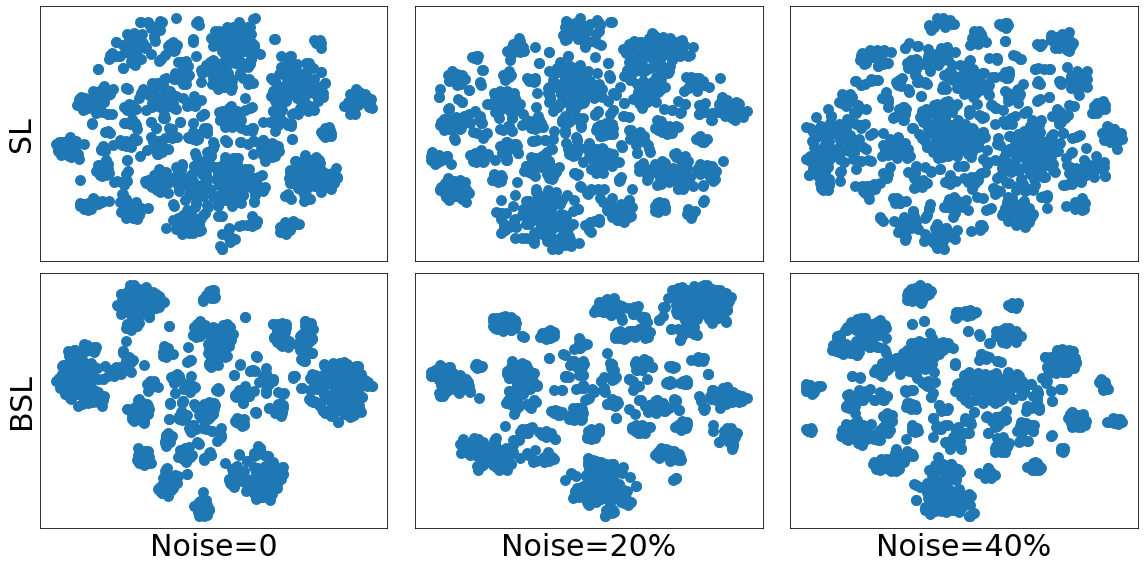

In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
fig, axs = plt.subplots(2, 3, figsize=(16, 8), facecolor='white')
size_cnt=120
# color=""
for i, data_tsn_2d in enumerate(data_tsn_array[6:12]):
    df_tsne = pd.DataFrame(data_tsn_2d, columns=['dim1', 'dim2'])
    df_tsne[['dim1']] = df_tsne[['dim1']].astype(float)
    df_tsne[['dim2']] = df_tsne[['dim2']].astype(float)
    axs_cnt = axs[i // 3][i % 3]
    # print(axs_cnt)
    sns.scatterplot(data=df_tsne, x='dim1', y='dim2', ax=axs_cnt, s=size_cnt, linewidth=1e-3) 
    axs_cnt.set_xticks([])
    axs_cnt.set_yticks([])
    axs_cnt.set_ylabel('')
    axs_cnt.set_xlabel('')
    # axs_cnt.set_visible(False)
axs[0][0].set_ylabel('SL', fontsize=30)
axs[1][0].set_ylabel('BSL', fontsize=30)

axs[1][0].set_xlabel('Noise=0', fontsize=30)
axs[1][1].set_xlabel('Noise=20%', fontsize=30)
axs[1][2].set_xlabel('Noise=40%', fontsize=30)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.08, hspace =0.05)#调整子图间距
# plt.show()
plt.savefig("../figs/gowalla_tsne.pdf", bbox_inches = 'tight')

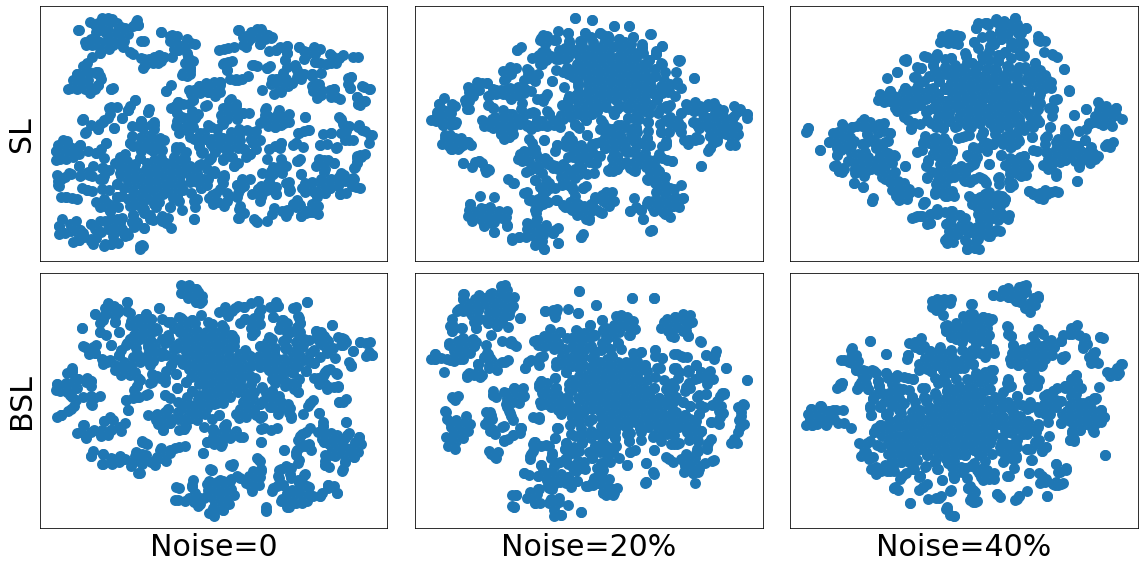

In [14]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
fig, axs = plt.subplots(2, 3, figsize=(16, 8), facecolor='white')
size_cnt=120
# color=""
for i, data_tsn_2d in enumerate(data_tsn_array[12:]):
    df_tsne = pd.DataFrame(data_tsn_2d, columns=['dim1', 'dim2'])
    df_tsne[['dim1']] = df_tsne[['dim1']].astype(float)
    df_tsne[['dim2']] = df_tsne[['dim2']].astype(float)
    axs_cnt = axs[i // 3][i % 3]
    # print(axs_cnt)
    sns.scatterplot(data=df_tsne, x='dim1', y='dim2', ax=axs_cnt, s=size_cnt, linewidth=1e-3) 
    axs_cnt.set_xticks([])
    axs_cnt.set_yticks([])
    axs_cnt.set_ylabel('')
    axs_cnt.set_xlabel('')
    # axs_cnt.set_visible(False)
axs[0][0].set_ylabel('SL', fontsize=30)
axs[1][0].set_ylabel('BSL', fontsize=30)

axs[1][0].set_xlabel('Noise=0', fontsize=30)
axs[1][1].set_xlabel('Noise=20%', fontsize=30)
axs[1][2].set_xlabel('Noise=40%', fontsize=30)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.08, hspace =0.05)#调整子图间距
# plt.show()
plt.savefig("../figs/ml_tsne.pdf", bbox_inches = 'tight')

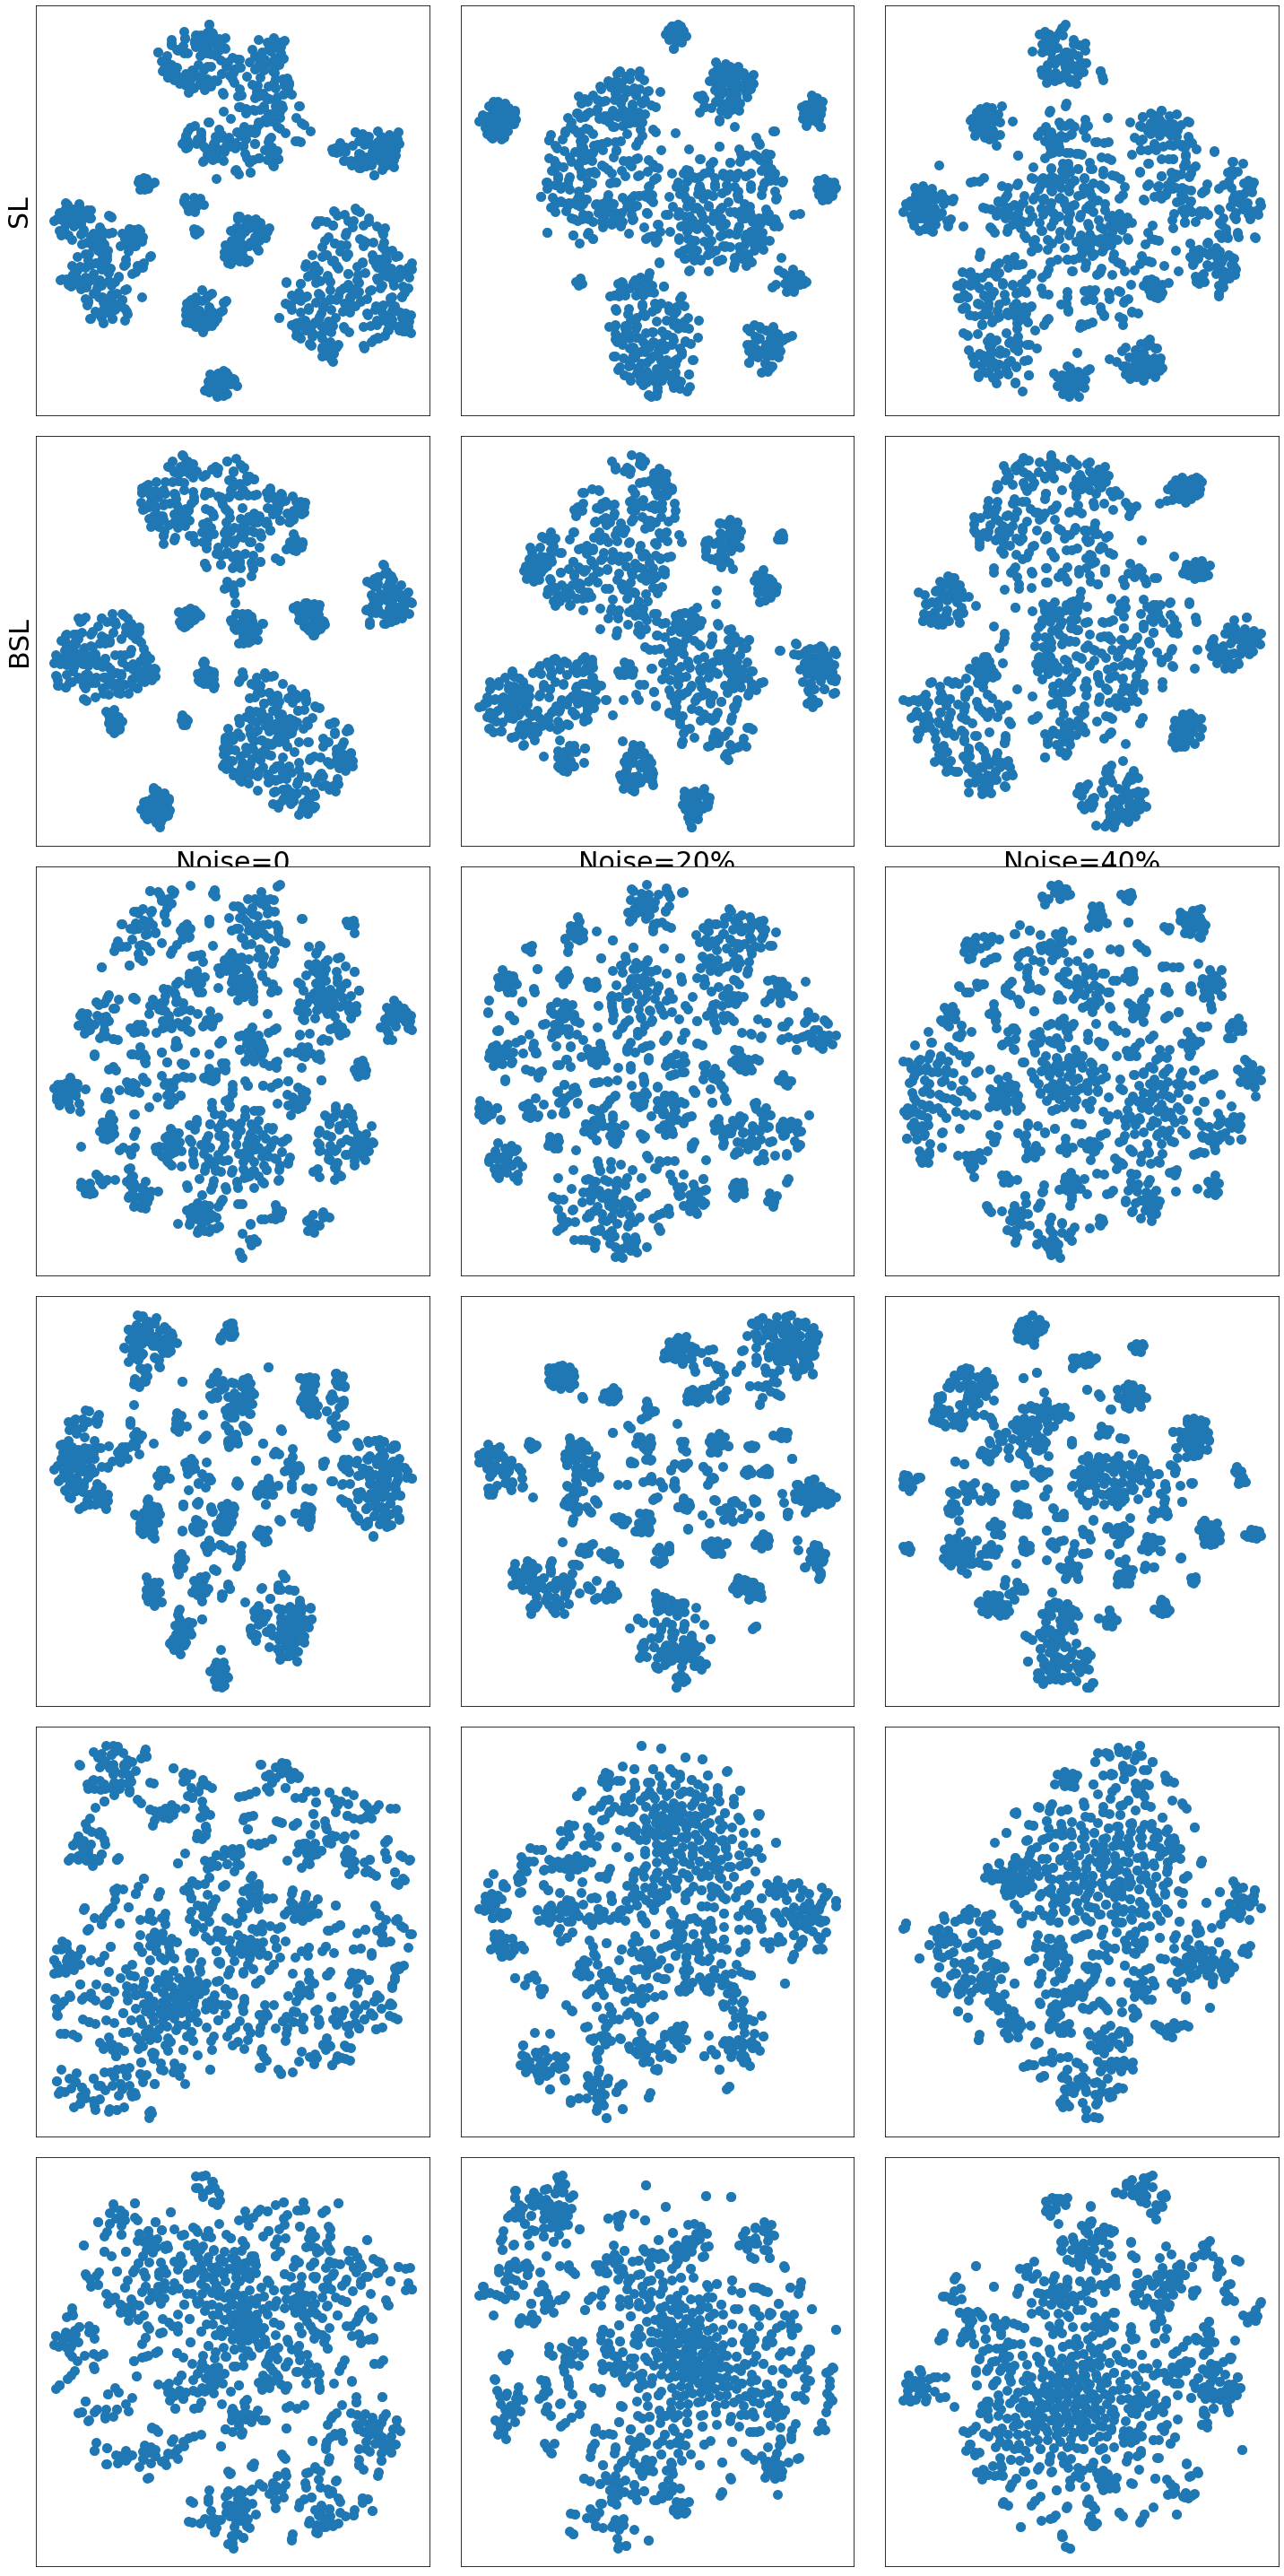

In [10]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
fig, axs = plt.subplots(6, 3, figsize=(20, 40), facecolor='white')
size_cnt=120
# color=""
for i, data_tsn_2d in enumerate(data_tsn_array):
    df_tsne = pd.DataFrame(data_tsn_2d, columns=['dim1', 'dim2'])
    df_tsne[['dim1']] = df_tsne[['dim1']].astype(float)
    df_tsne[['dim2']] = df_tsne[['dim2']].astype(float)
    axs_cnt = axs[i // 3][i % 3]
    # print(axs_cnt)
    sns.scatterplot(data=df_tsne, x='dim1', y='dim2', ax=axs_cnt, s=size_cnt, linewidth=1e-3) 
    axs_cnt.set_xticks([])
    axs_cnt.set_yticks([])
    axs_cnt.set_ylabel('')
    axs_cnt.set_xlabel('')
    # axs_cnt.set_visible(False)
axs[0][0].set_ylabel('SL', fontsize=30)
axs[1][0].set_ylabel('BSL', fontsize=30)

axs[1][0].set_xlabel('Noise=0', fontsize=30)
axs[1][1].set_xlabel('Noise=20%', fontsize=30)
axs[1][2].set_xlabel('Noise=40%', fontsize=30)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.08, hspace =0.05)#调整子图间距
plt.show()
# plt.savefig("../figs/tsne3.pdf", bbox_inches = 'tight')

# sns.scatterplot(data=data_tsn_array[1], x='dim1', y='dim2', ax=axs[0]) 

# FALSE POSITIVE

In [74]:
'''
This is the codes for parsing scores.
We store scores of each epoch in one file to prevent too much small files to affect I/O.

'''

import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import axes3d

def parsing_epoch(filePath):
    dirlist=os.listdir(filePath)
    dirlist.sort()
    filelist=[]
    for i in dirlist:
        filelist.append(np.load(filePath+i,allow_pickle=True))

    var=[]
    mean=[]
    posmean=[]
    posvar=[]
    for i in range(len(filelist)):
        for j in range(len(filelist[i])):
            mean.append(filelist[i][j].mean())
            var.append(filelist[i][j].var())

    return mean, var

In [75]:
amazon=parsing_epoch('/data/wujk/codes/BSL/SAVE/ICDE_SAVE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_09_11_2023_18:19:40/')
gowalla=parsing_epoch('/data/wujk/codes/BSL/SAVE/ICDE_SAVE_gowalla_DRO_POS_mf_frame_t1_0.08_t2_1.00_t3_1.0_1024_800_lr_1e-4_l2_1e-9_DROP_False_MODE_reweight_09_11_2023_18:19:07/')
ml=parsing_epoch('/data/wujk/codes/BSL/SAVE/ICDE_SAVE_ml_DRO_POS_mf_frame_t1_0.17_t2_1.00_t3_1.0_2048_800_lr_1e-4_l2_1e-3_NODROP_False_MODE_reweight_09_11_2023_18:19:15/')
yelp2018=parsing_epoch('/data/wujk/codes/BSL/SAVE/ICDE_SAVE_yelp2018_DRO_POS_mf_frame_t1_0.11_t2_1.00_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_reweight_09_11_2023_18:14:34/')

In [19]:
np.load("/data/wujk/codes/BSL/SAVE/ICDE_SAVE_amazon_DRO_POS_mf_frame_t1_0.14_t2_1.00_t3_1.0_1024_1024_lr_5e-4_l2_1e-3_DROP_False_MODE_reweight_09_11_2023_18:19:40/score_0.npy", allow_pickle=True).shape

(1336,)

In [20]:
np.load("/data/wujk/codes/BSL/SAVE/ICDE_SAVE_gowalla_DRO_POS_mf_frame_t1_0.08_t2_1.00_t3_1.0_1024_800_lr_1e-4_l2_1e-9_DROP_False_MODE_reweight_09_11_2023_18:19:07/score_0.npy", allow_pickle=True).shape

(792,)

In [21]:
np.load("/data/wujk/codes/BSL/SAVE/ICDE_SAVE_ml_DRO_POS_mf_frame_t1_0.17_t2_1.00_t3_1.0_2048_800_lr_1e-4_l2_1e-3_NODROP_False_MODE_reweight_09_11_2023_18:19:15/score_0.npy", allow_pickle=True).shape

(389,)

In [22]:
np.load("/data/wujk/codes/BSL/SAVE/ICDE_SAVE_yelp2018_DRO_POS_mf_frame_t1_0.11_t2_1.00_t3_1.0_1024_800_lr_1e-4_l2_1e-3_DROP_False_MODE_reweight_09_11_2023_18:14:34/score_0.npy", allow_pickle=True).shape

(1209,)

In [65]:
gowalla

[-0.005215,
 -0.002146,
 -0.000317,
 0.0001409,
 0.0007334,
 -0.002329,
 0.003237,
 -0.004616,
 -9.78e-05,
 0.002716,
 0.005005,
 -0.000139,
 0.000332,
 -0.0007224,
 0.006027,
 -0.005814,
 -0.0005336,
 -0.002258,
 -0.003756,
 0.005447,
 -0.006996,
 0.001697,
 0.002987,
 0.0002406,
 0.001245,
 -0.005547,
 0.001849,
 0.004307,
 -0.004,
 0.004055,
 -0.00288,
 0.0005403,
 -0.00718,
 -0.002083,
 0.0007606,
 0.006836,
 0.004967,
 0.001917,
 0.001381,
 -0.004486,
 0.001803,
 -4.584e-05,
 0.000262,
 -0.002254,
 -0.0019245,
 0.004356,
 -0.001464,
 -0.0001923,
 0.002617,
 -0.00472,
 0.002962,
 0.000244,
 -0.003153,
 -0.00431,
 0.00138,
 0.00469,
 -0.0007415,
 0.0064,
 -0.001846,
 0.00242,
 0.006527,
 -0.004772,
 0.0009446,
 -0.001482,
 0.004234,
 0.000922,
 0.002405,
 0.00484,
 -0.002697,
 -0.004875,
 -0.008995,
 -0.001883,
 -0.003838,
 -0.001421,
 0.003445,
 -0.000598,
 0.01399,
 0.001035,
 0.00409,
 -0.0009446,
 0.002962,
 0.005165,
 -0.00482,
 0.005615,
 0.001535,
 -0.002157,
 -0.006893,
 -0.

In [62]:
amazon[-50:]

[0.4348,
 0.437,
 0.4382,
 0.4353,
 0.4333,
 0.434,
 0.427,
 0.435,
 0.435,
 0.4302,
 0.4329,
 0.426,
 0.4277,
 0.4348,
 0.4348,
 0.426,
 0.4285,
 0.428,
 0.4272,
 0.4365,
 0.4312,
 0.4404,
 0.428,
 0.4219,
 0.4302,
 0.434,
 0.4265,
 0.431,
 0.4355,
 0.434,
 0.4348,
 0.419,
 0.415,
 0.4321,
 0.422,
 0.4326,
 0.4294,
 0.433,
 0.4333,
 0.428,
 0.433,
 0.4346,
 0.4377,
 0.435,
 0.434,
 0.4292,
 0.4282,
 0.4263,
 0.4392,
 0.425]

In [57]:
np.max(gowalla)

0.5454

In [58]:
np.mean(gowalla)

0.512

In [59]:
np.mean(ml)

0.2585

In [60]:
np.mean(amazon)

0.4443

In [61]:
np.mean(yelp2018)

0.502

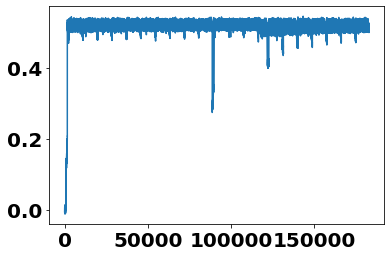

In [55]:
# plt.plot(ml)
# plt.plot(amazon)
plt.plot(gowalla)
# plt.plot(yelp2018)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


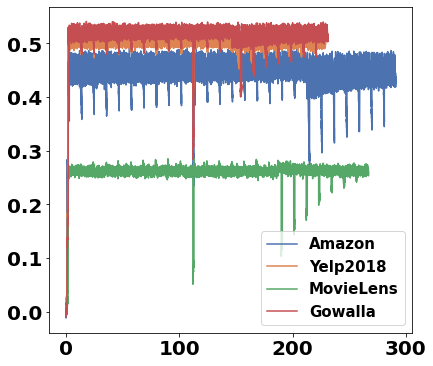

In [68]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import axes3d
font2 = {'family': 'sans-serif',
        'sans-serif': 'Helvetica',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font2)
f, axs = plt.subplots(1, 1,figsize=(6.5, 6), facecolor='white')
colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]

ax_cnt = axs
x_1 = np.arange(0, len(amazon), 10)
y_1 = np.array(amazon)[x_1]
ax_cnt.plot(x_1 / 1336, y_1, color=colors[0])

x_2 = np.arange(0, len(yelp2018), 10)
y_2 = np.array(yelp2018)[x_2]
ax_cnt.plot(x_2 / 1209, y_2, color=colors[1])

x_3 = np.arange(0, len(ml), 10)
y_3 = np.array(ml)[x_3]
ax_cnt.plot(x_3 / 389, y_3, color=colors[2])

x_4 = np.arange(0, len(gowalla), 10)
y_4 = np.array(gowalla)[x_4]
ax_cnt.plot(x_4 / 792, y_4, color=colors[3])

# x=np.arange(0, len(score_t002[0]), 10)
# y = np.array(score_t002[2])[x]
# alpah1=0.8
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t002[2])[x], color=colors[0])
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t004[2])[x], color=colors[1])
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t006[2])[x], color=colors[2])
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t008[2])[x], color=colors[3])
ax_cnt.legend(loc='best',labels=[r'Amazon', r'Yelp2018', r'MovieLens', r'Gowalla'], prop={'size':15})

# f.tight_layout()#调整整体空白
# plt.subplots_adjust(wspace=0.12, hspace =0.10)#调整子图间距

# axs[0].set_xlabel(r'Epoch', fontsize=25)
# axs[1].set_xlabel(r'Epoch', fontsize=25)

# axs[0].set_title(r'Variance of Neg', fontsize=25)
# axs[1].set_title(r'Mean of Pos', fontsize=25)

# plt.savefig("../figs/new_variance_change.pdf", bbox_inches = 'tight')
plt.show()

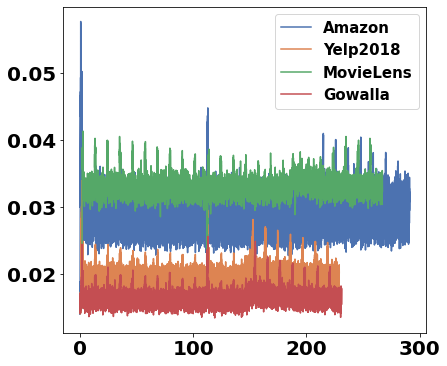

In [76]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import axes3d
font2 = {'family': 'sans-serif',
        'sans-serif': 'Helvetica',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font2)
f, axs = plt.subplots(1, 1,figsize=(6.5, 6), facecolor='white')
colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]

ax_cnt = axs
x_1 = np.arange(0, len(amazon[1]), 10)
y_1 = np.array(amazon[1])[x_1]
ax_cnt.plot(x_1 / 1336, y_1, color=colors[0])

x_2 = np.arange(0, len(yelp2018[1]), 10)
y_2 = np.array(yelp2018[1])[x_2]
ax_cnt.plot(x_2 / 1209, y_2, color=colors[1])

x_3 = np.arange(0, len(ml[1]), 10)
y_3 = np.array(ml[1])[x_3]
ax_cnt.plot(x_3 / 389, y_3, color=colors[2])

x_4 = np.arange(0, len(gowalla[1]), 10)
y_4 = np.array(gowalla[1])[x_4]
ax_cnt.plot(x_4 / 792, y_4, color=colors[3])

# x=np.arange(0, len(score_t002[0]), 10)
# y = np.array(score_t002[2])[x]
# alpah1=0.8
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t002[2])[x], color=colors[0])
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t004[2])[x], color=colors[1])
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t006[2])[x], color=colors[2])
# ax_cnt.plot(np.array(x )/ 195, np.array(score_t008[2])[x], color=colors[3])
ax_cnt.legend(loc='best',labels=[r'Amazon', r'Yelp2018', r'MovieLens', r'Gowalla'], prop={'size':15})

# f.tight_layout()#调整整体空白
# plt.subplots_adjust(wspace=0.12, hspace =0.10)#调整子图间距

# axs[0].set_xlabel(r'Epoch', fontsize=25)
# axs[1].set_xlabel(r'Epoch', fontsize=25)

# axs[0].set_title(r'Variance of Neg', fontsize=25)
# axs[1].set_title(r'Mean of Pos', fontsize=25)

# plt.savefig("../figs/new_variance_change.pdf", bbox_inches = 'tight')
plt.show()

In [72]:
amazon

[-0.002132,
 -0.004654,
 0.0002506,
 0.002794,
 -0.000983,
 0.00145,
 -0.002497,
 -0.0007515,
 0.004906,
 0.0011425,
 -0.001257,
 -0.0015545,
 -0.001799,
 0.002272,
 -0.00283,
 -0.001324,
 -0.00362,
 -0.002506,
 0.004642,
 -0.00438,
 -0.00749,
 -0.004677,
 0.003435,
 0.000811,
 0.0041,
 0.003815,
 0.00068,
 -0.001776,
 0.00336,
 -0.005287,
 -0.001791,
 0.002663,
 -0.0005937,
 0.000839,
 -0.004704,
 0.004696,
 -0.007507,
 1.24e-05,
 0.001245,
 -0.006153,
 0.00459,
 0.001181,
 -0.000489,
 0.0009704,
 0.001621,
 -0.002596,
 -0.002968,
 -0.004276,
 0.004623,
 -0.003315,
 0.003414,
 0.00289,
 0.000726,
 -0.0001974,
 -0.006706,
 -0.001111,
 0.0006213,
 0.003408,
 -0.002089,
 -0.00010335,
 -0.0004206,
 -0.0001102,
 0.006207,
 0.001649,
 -0.007214,
 0.003448,
 -0.002089,
 0.00662,
 0.001679,
 -0.0055,
 -0.001307,
 0.004337,
 -0.00375,
 0.00542,
 -0.0002484,
 -0.003506,
 -0.002258,
 -0.0009985,
 0.002813,
 0.004234,
 -0.001393,
 0.000819,
 -0.002218,
 0.002075,
 -0.003002,
 0.0005035,
 -0.00044